# Documentation:
Following is a HR Analytics Dataset. As a HR professional it is important for us to explore the data and draw inferences and come to conclusions. This will help in decision making and integrate HR with business goals. The following dataset has the given columns,
1. Emp_Id - Unique employee identifier
2. Department - which department the employee works in
3. salary - The salary grade to which the employee belongs
4. satisfaction_level - Employee satisfaction level on a scale of 0-1
5. last_evaluation - Employee last performance evaluation on a scale of 0-1
6. number_projects - number of projects employee is currently working on
7. average_monthly_hours = 3 month average working hours of employee
8. time_spend_company - time spent by the employee in transit to work 
9. work_accident - A binary value indicating if the employee has been in a work accident in their tenure
10. promotion_last_5years - a binary value indicating if the employee has been promoted in the past 5 years
11. left - our target feature, has the employee left the organization or stayed? 

In this code, we have an in-depth Exploratory data analysis with inferences based on the analysis. Also, we have used 8 ML algorithms and ANN to predict the attrition of the employee, results of which is captured in a table at the end. <br>
<br>Following are the steps followed in this code:
   1. Import Libraries
   2. Loading and Understanding Data
   3. EDA - Univariate, Bivariate & Multivariate analysis
   4. Feature Engineering - Imputing, Handling Outliers, Binning, Column drop, Encoding
   5. Modelling - Train-test Split, Handling Imbalanced data, Feature scaling, Modelling & Hyperparameter tuning 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install openpyxl

     |████████████████████████████████| 242 kB 924 kB/s            


In [2]:
matplotlib.rcParams['figure.figsize'] = (12,6)

# Loading & Understanding Data

In [3]:
df = pd.read_excel('../input/hr-employee-data-descriptive-analytics/HR_Employee_Data.xlsx')

In [4]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Questions Answered:

1. Total Number of records = 14999
2. Total number of features = 11
3. Number of categorical features = 3
4. Number of numerical features = 8
5. Target feature = left (attrition)
6. Null values = There are no null/missing values in the dataset

# Exploratory Data Analysis

## Univariate Analysis

In [7]:
#Categorical Features

<b>Are there any repeat employees?

In [8]:
df['Emp_Id'].nunique() 

14999

There are 14999 unique employee IDs indicating that there are no duplicates

<b>Which are the different types of departments? Which of them have the max and min number of employees?

In [9]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

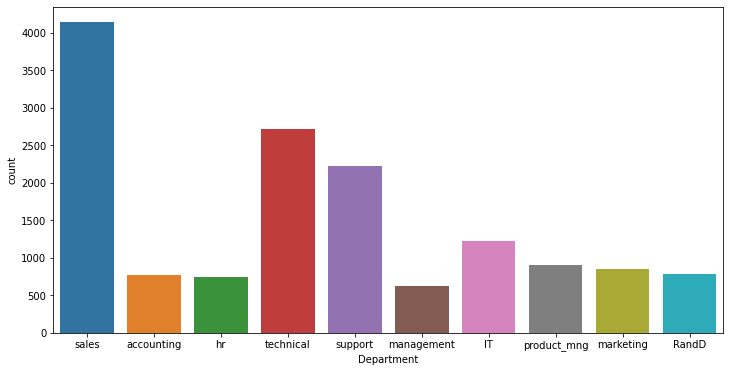

In [10]:
sns.countplot(data=df,x='Department')

1. Sales team has the highest employees with 4140.
2. Management has the lowest employees with 630.

<b>Are the salaries of employees normally distributed across the organization? 

<AxesSubplot:xlabel='salary', ylabel='Count'>

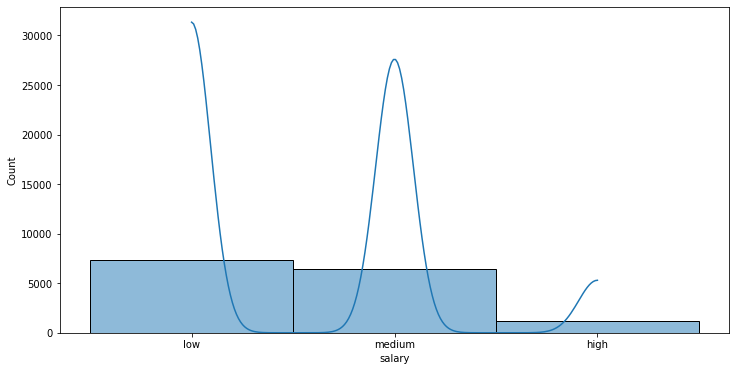

In [11]:
sns.histplot(data=df,x='salary',kde=True)

Not exactly a normal Distribution is it?! Seems a lot of employees in this company are paid low salaries and very few are paid high salary. 

<b>Are all employees Indian? 

In [12]:
    indian = 0
    not_indian = 0
    for i in range(0,14998):
        if df['Emp_Id'][i][:3] == 'IND':
            indian+=1
        else:
            not_indian+=1
    print('Not Indian= '+ str(not_indian))
    print('Indians= '+str(indian))

Not Indian= 0
Indians= 14998


The employee ID begins with the country code IND. There are no non-indians in the list of employees.

<b>Are there any null values in the dataset that need to be adressed?

In [13]:
df.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There are no null values in the dataset. 

Let's look at the numerical features and determine the 5-point summary. We shall look for the max, min, avg, 25th percentile and 75th percentile for the numerical features. 

In [14]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<b>How many employees are invovled in work accidents? 

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

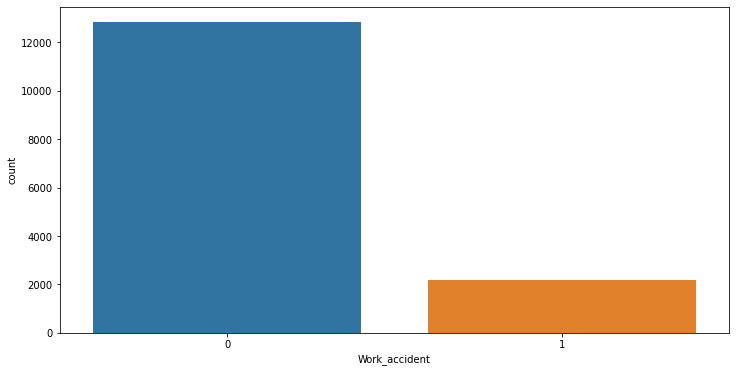

In [15]:
sns.countplot(data=df,x='Work_accident')

Looks like around 2000 employees were involved in work accidents. 

<b>How many employees were promoted in the last 5 years?

In [16]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

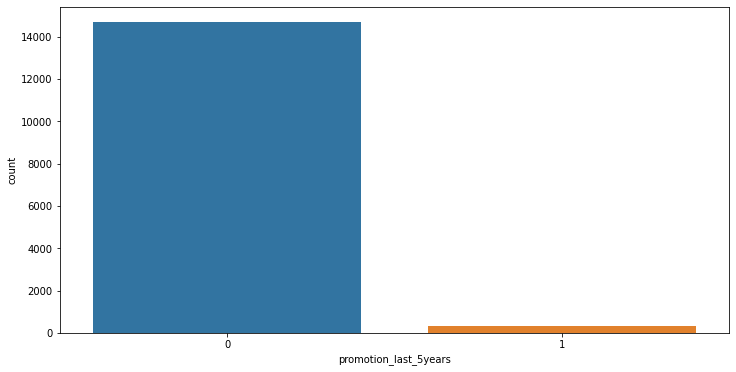

In [17]:
sns.countplot(data=df,x='promotion_last_5years')

Looks like a really small %, Only 319 employees of 14999 were promoted in the last 5 years. This is a really small number indicating that the company needs better career advancement policies if they want to retain employees.

<b>Is the dataset balanced? The target column is :left

<AxesSubplot:xlabel='left', ylabel='count'>

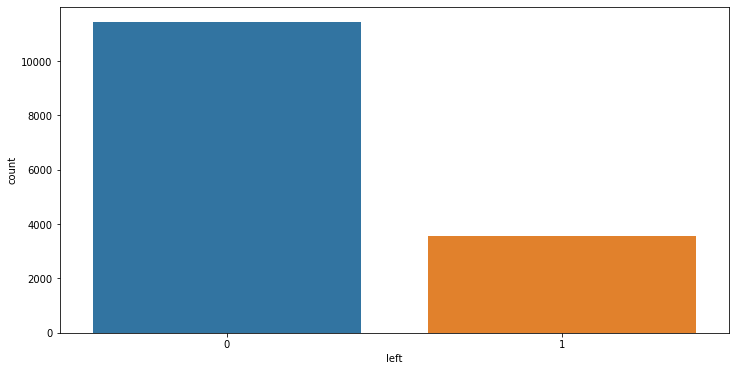

In [18]:
sns.countplot(data=df,x='left')

It is an unbalanced dataset, wherein the number of employees who left are significantly lesser to those who stayed. We shall account for this while training our model.

Let's look for outliers if any. We shall use the box plot followed by a custom function to return the outliers. 

<AxesSubplot:xlabel='satisfaction_level'>

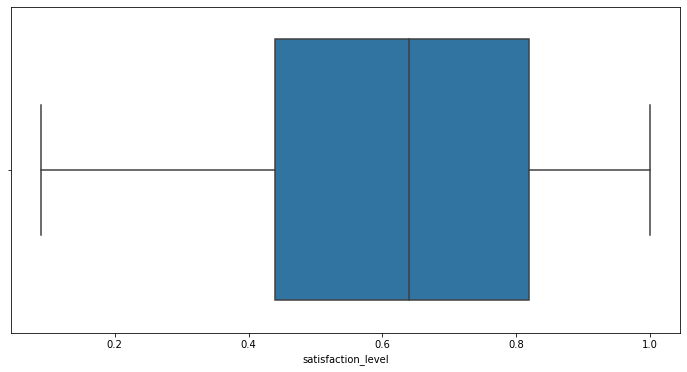

In [19]:
sns.boxplot(data=df,x='satisfaction_level')

<AxesSubplot:xlabel='last_evaluation'>

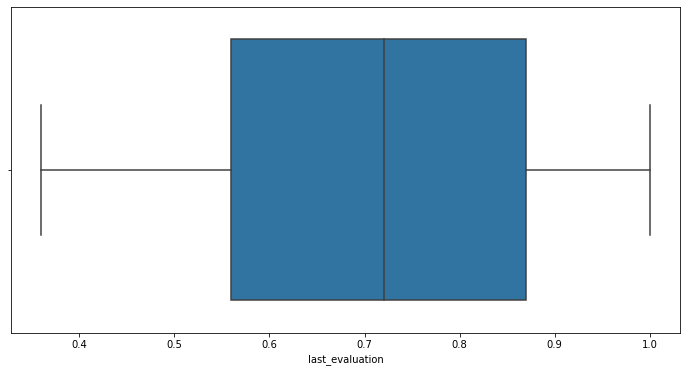

In [20]:
sns.boxplot(data=df,x='last_evaluation')

<AxesSubplot:xlabel='number_project'>

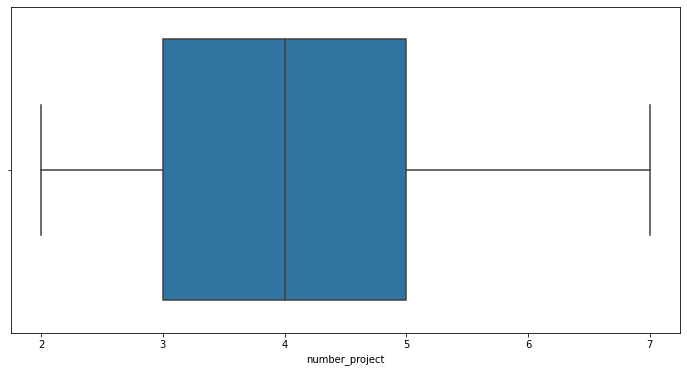

In [21]:
sns.boxplot(data=df,x='number_project')

<AxesSubplot:xlabel='average_montly_hours'>

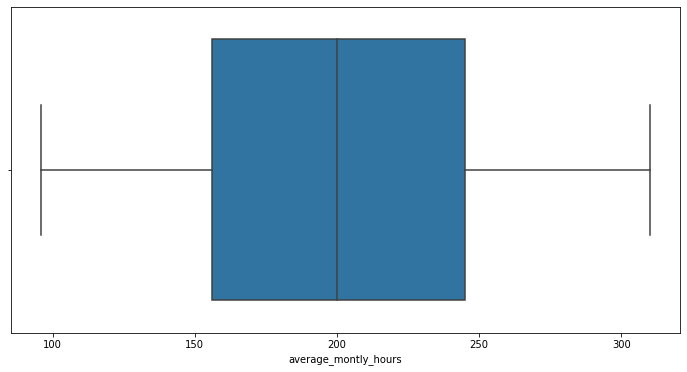

In [22]:
sns.boxplot(data=df,x='average_montly_hours')

<AxesSubplot:xlabel='time_spend_company'>

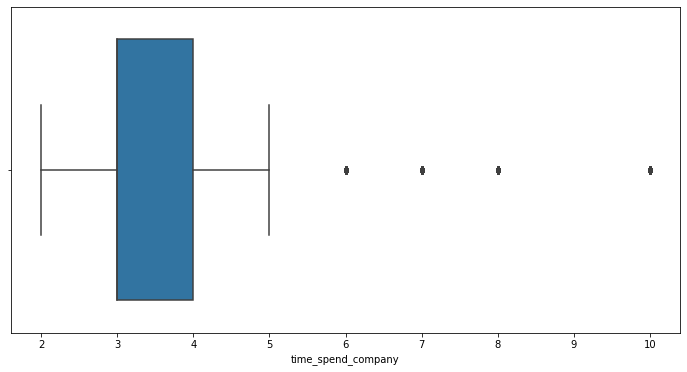

In [23]:
sns.boxplot(data=df,x='time_spend_company')

Looks like "time_spend_company" is the only feature with outliers. Few employees spend a lot of time travelling. In bivariate analysis we shall explore how this affects the performance and attrition of the company. 

Let us determine which are these outliers:

In [24]:
def return_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    outliers = []
    IQR = Q3-Q1
    lower_fence = Q1-1.5*IQR
    upper_fence = Q3+1.5*IQR
    for i in df:
        if i<lower_fence or i>upper_fence:
            outliers.append(i)
    return outliers
        

In [25]:
return_outliers(df['time_spend_company'])

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [26]:
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

Looks like there are employees who travel 6,7,8 and 10 hours to work. That is a lot of travel. We shall address these outliers while modelling at a later stage. This is an indicator that we need to adopt alternate methods of working such as WFH or House rent allowance to be able to rent homes closer to office for those employees who travel 6-10 hours 

In [27]:
df.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<b>How does each feature fare against the target feature?? </b>
1. Employees who left are from which department mainly?
2. What was the salaries of those employees who left? Do we see a pattern?
3. Do we see any relation between satisfaction_level of employees and them staying with the org?
4. How is the performance evaluation scores of those employees who left or stayed?
5. How many projects do employees who stay usually work on? Do we see a pattern?
6. What is the average monthly hours worked by employees who left or stayed? Do those who overworked left the company or vice-versa?
7. What does the retention look like for employees who spend a lot of hours (6,7,8,10 hrs) in transit?
8. Does work accidents impact employee stay with the org?
9. How many employees who were promoted in the last 5 years remained with the company?
10. How many employees who weren't promoted in the last 5 years left the company? 

<AxesSubplot:xlabel='Department', ylabel='count'>

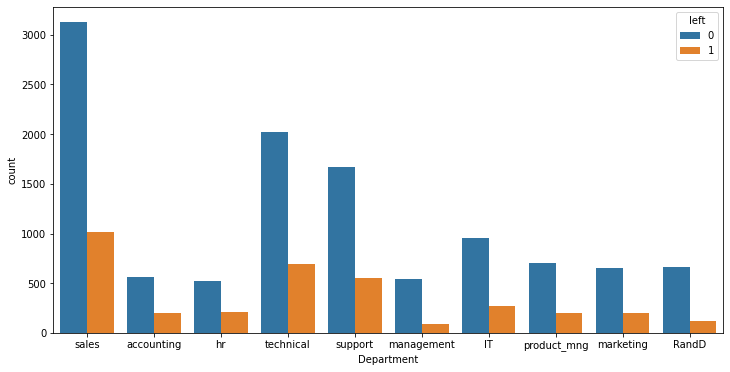

In [28]:
sns.countplot(data=df,x='Department',hue='left')

Most of the employees who left are from either, 
1. Sales 
2. Technical 
3. Support Departments 

<AxesSubplot:xlabel='salary', ylabel='count'>

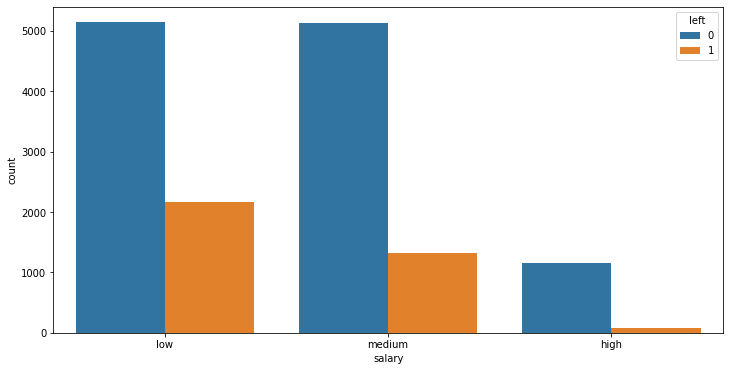

In [29]:
sns.countplot(data=df,x='salary',hue='left')

Employees with high salary often stayed back. Most employees who left are either from low or medium salary range. 

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

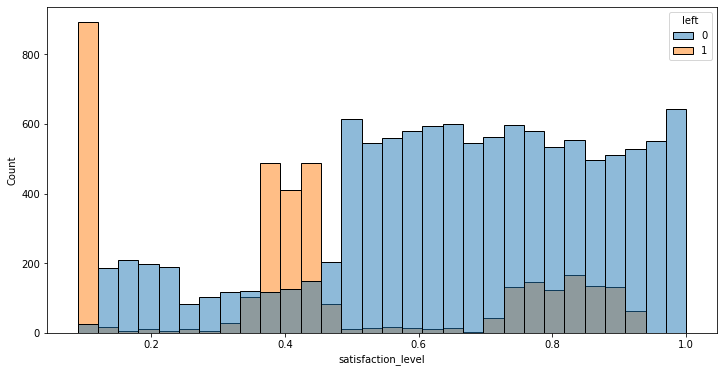

In [30]:
sns.histplot(data=df,x='satisfaction_level',hue='left')

Employees with a very low satisfaction level (0) mostly left the company. We also observe that employees with satisfaction levels ranging around 0.4 left the company as well.

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

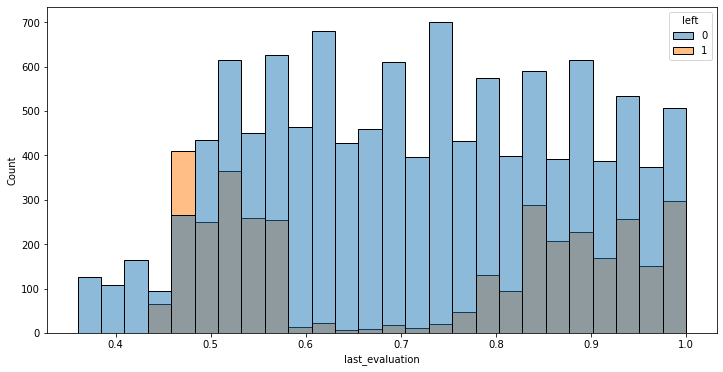

In [31]:
sns.histplot(data=df,x='last_evaluation',hue='left')

Employees with average performance rating of 0.7 are mostly the ones who stayed back. 
1. Employees with high evaluation could've left as they are high performers and are not getting enough opportunities
2. Uninterested employees or employees with lower evaluation scores have also left the company - can be due to lack of competence or interest

<AxesSubplot:xlabel='number_project', ylabel='Count'>

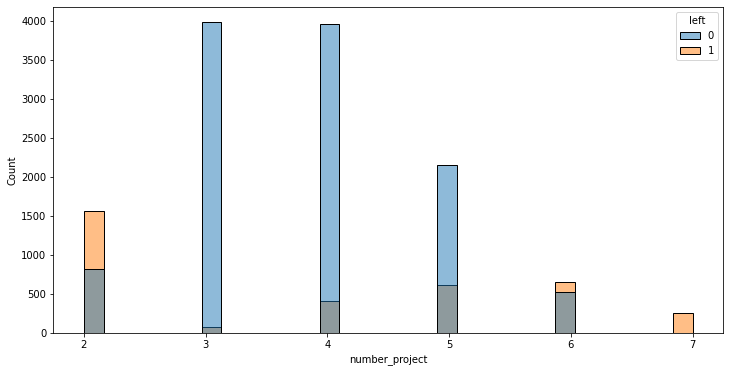

In [32]:
sns.histplot(data=df,x='number_project',hue='left')

Employees who have stayed maximum are those working on 3 projects at a time. Those who work on 5 or more can face burnout causing their exit, or those working on 2 projects or less could have left due to lack of interest or monotonous work on single projects. <br>
Optimum count of projects to work on = 3 or 4 

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

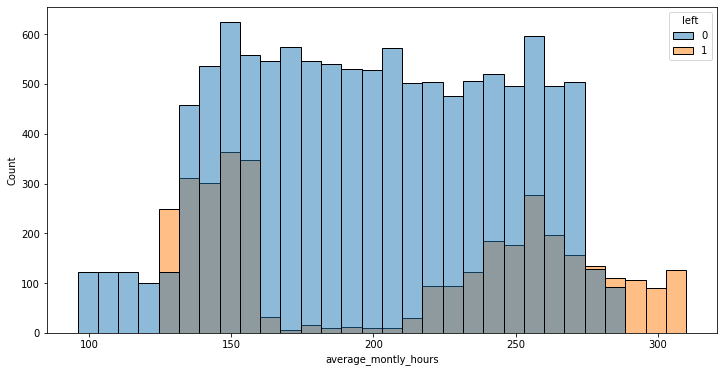

In [33]:
sns.histplot(data=df,x='average_montly_hours',hue='left')

1. Employees who worked between 170-220 hours stayed the most 
2. Employees working more than 225+ hours have left the company. (possible burnouts)
3. Employees who worked between 120-150 hrs also seem to have left the company. 
4. Lowest attrition is when employees work less than 120 hours (Could be laid-back)

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

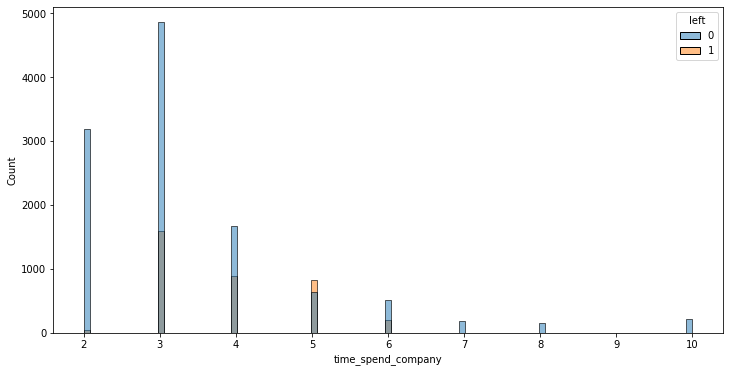

In [34]:
sns.histplot(data=df,x='time_spend_company',hue='left')

Surprisingly employees who travelled 7,8 or 10 hours stayed with the company. While those who spent 3-5 hours in transit left the company. 

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

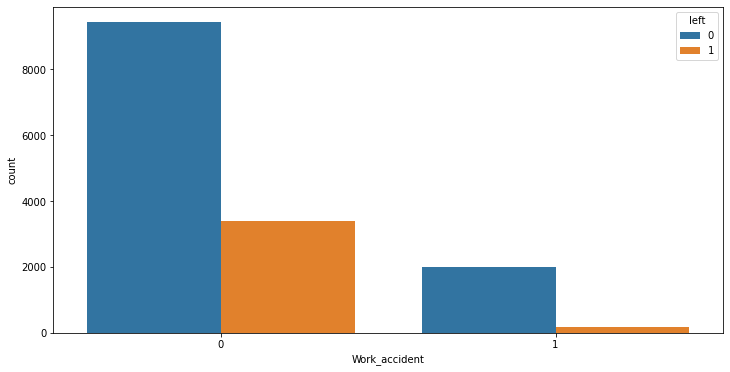

In [35]:
sns.countplot(data=df,x='Work_accident',hue='left')

There is not much impact of work accidents on employee attrition. 

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

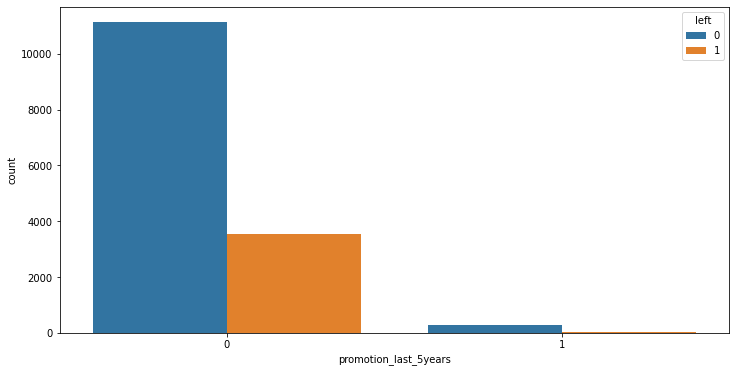

In [36]:
sns.countplot(data=df,x='promotion_last_5years',hue='left')

In [37]:
len(df[df['promotion_last_5years']==1][df['left']==1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


19

Looks like almost all the employees who left were those unpromoted. And though a very small number of employees were promoted, almost all of them stayed back (except 19) indicating that better promotion decisions need to be made and career growth opportunities should be given. 

## Bivariate Analysis 

In [38]:
df.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<b>What is the average satisfaction level across the different departments? How does this affect employee attrition?

<AxesSubplot:xlabel='Department', ylabel='satisfaction_level'>

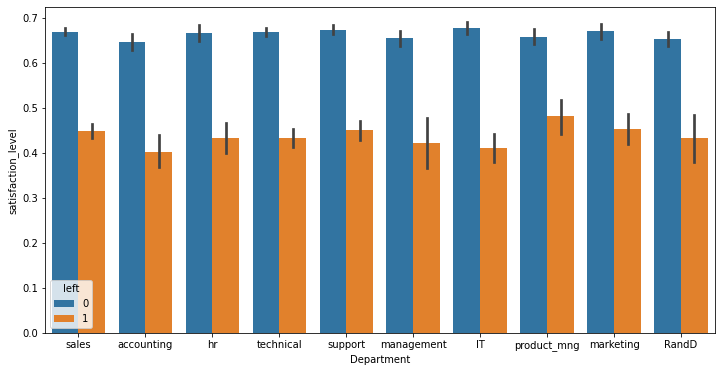

In [39]:
sns.barplot(data=df,x='Department',y='satisfaction_level',hue='left')

Across the departments, the mean of the satisfaction_rates is between the range of 0.4 to 0.5 in case of employees who left, while it is in the range of 0.6 to 0.7 in the case of employees who remained with the organization. <br>
IT and Accounting depts have the lowest average satisfaction rating in employees who left, while product_mgt has the highest satisfaction_rating amongst employees who left
Therefore there is a clear relation between attrition and satisfaction rates. 

<b>What is the average performance evaluation scores across the different departments? How does this affect employee attrition?

<AxesSubplot:xlabel='Department', ylabel='last_evaluation'>

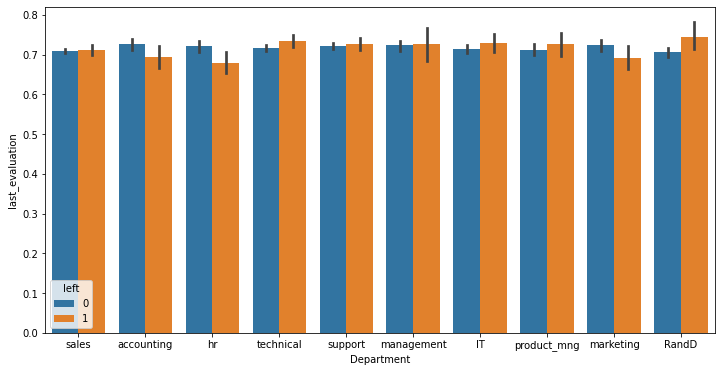

In [40]:
sns.barplot(data=df,x='Department',y='last_evaluation',hue='left')

<b>What is the number of projects handled by different departments? How does this affect employee attrition?

<AxesSubplot:xlabel='Department', ylabel='number_project'>

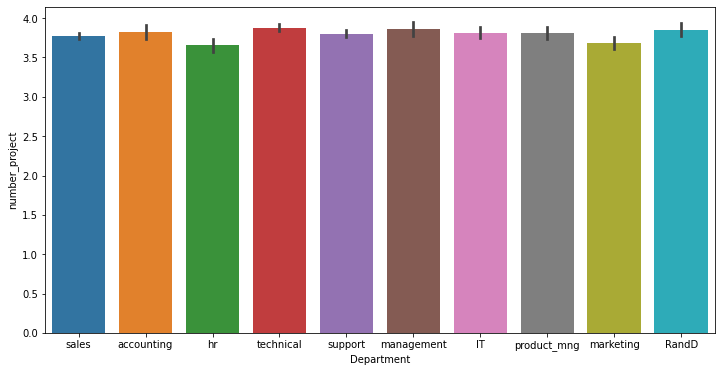

In [41]:
sns.barplot(data=df,x='Department',y='number_project')

Most departments handles between 3.5 to 4 projects per person. 

<b>What is the average monthly hours per department? How does this affect employee attrition?

<AxesSubplot:xlabel='Department', ylabel='average_montly_hours'>

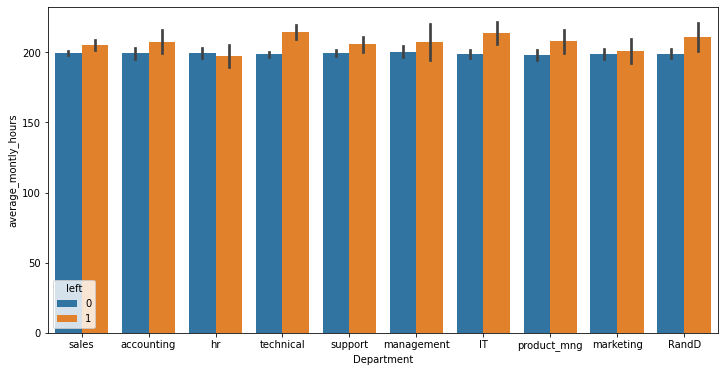

In [42]:
sns.barplot(data=df,x='Department',y='average_montly_hours',hue='left')

Looks like in all the departments, the average monthly hours of those employees who left the organization is greater than those who stayed back. Is it possible to conclude that over-working can be a cause for burnout which inturn affects employee attrition?

<b>What is the average time spent by employees in each department on travelling to office? How does it affect attrition?

<AxesSubplot:xlabel='Department', ylabel='time_spend_company'>

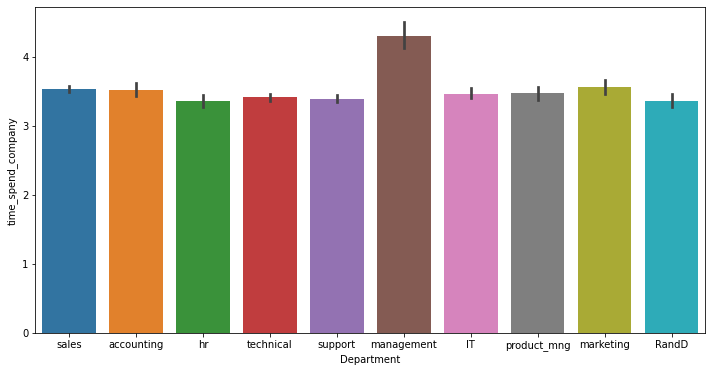

In [43]:
sns.barplot(data=df,x='Department',y='time_spend_company')

<AxesSubplot:xlabel='Department', ylabel='time_spend_company'>

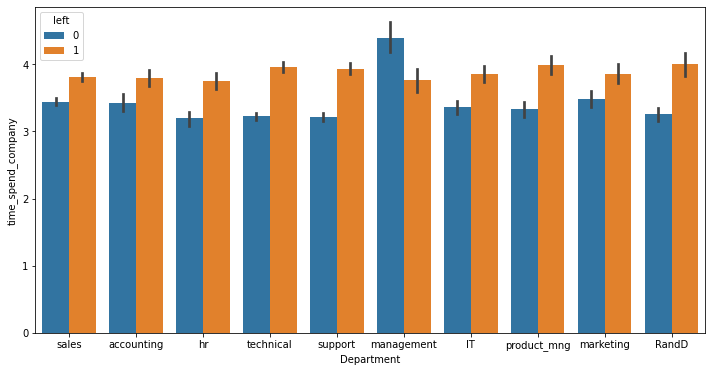

In [44]:
sns.barplot(data=df,x='Department',y='time_spend_company',hue='left')

1. Employees in management team seem to spend the maximum time travelling on average, to the organization. 
2. In all the departments, except Management, the time spent to travel to company for those employees who left the organization is much higher than those who decided to stay back. 

<b>How many employees were invloved in work accidents, department-wise? Did this affect attrition?

<AxesSubplot:xlabel='Department', ylabel='Work_accident'>

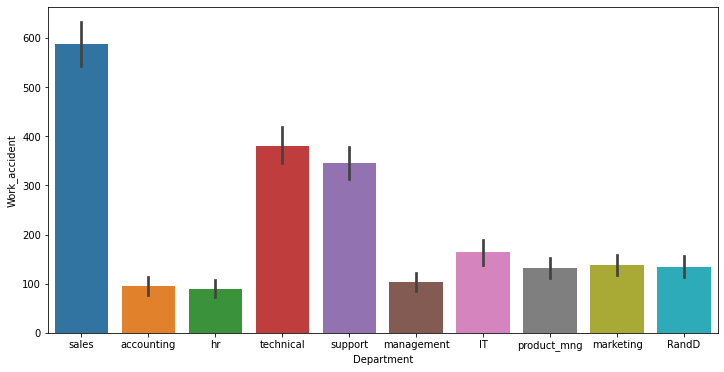

In [45]:
sns.barplot(data=df,x='Department',y='Work_accident',estimator=sum)

<AxesSubplot:xlabel='Department', ylabel='Work_accident'>

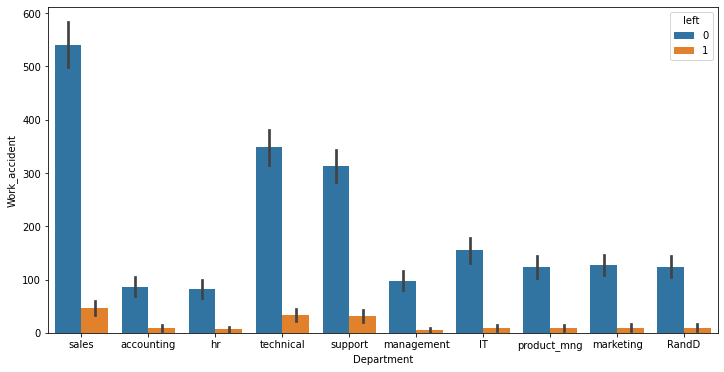

In [46]:
sns.barplot(data=df,x='Department',y='Work_accident',estimator=sum,hue='left')

<AxesSubplot:xlabel='Department', ylabel='Work_accident'>

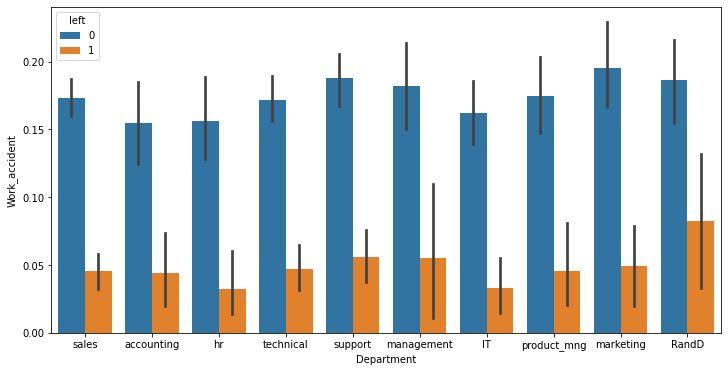

In [47]:
sns.barplot(data=df,x='Department',y='Work_accident',hue='left')

<AxesSubplot:xlabel='Department', ylabel='Work_accident'>

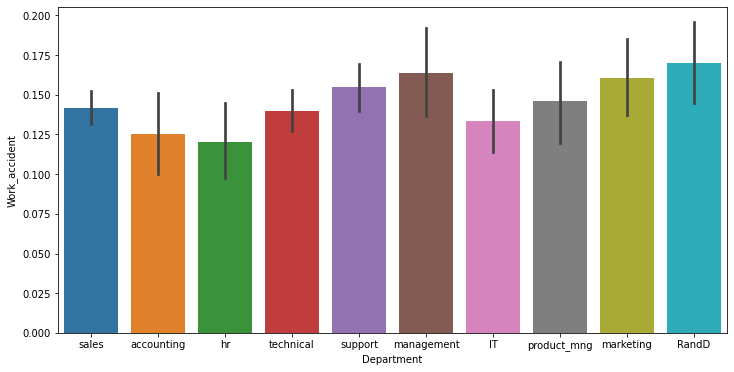

In [48]:
sns.barplot(data=df,x='Department',y='Work_accident')

1. Sales team had the highest number of employees involved in work accidents, followed by Technical and Support. 
2. Most of the employees with Work accidents, who left belong to Sales, Technical and Support teams. However the trend is similar across departments given the count of employees. So we can try and determine the average work accidents in each of the Departments. 
3. We find that the highest work accidents in from RnD dept. And there is a considerable impact on employee attrition.

<b>Which departments witnessed maximum promotions in the last 5 years? Has promotions impacted employee stay?

sns.barplot(data=df,x='Department',y='promotion_last_5years')

<AxesSubplot:xlabel='Department', ylabel='promotion_last_5years'>

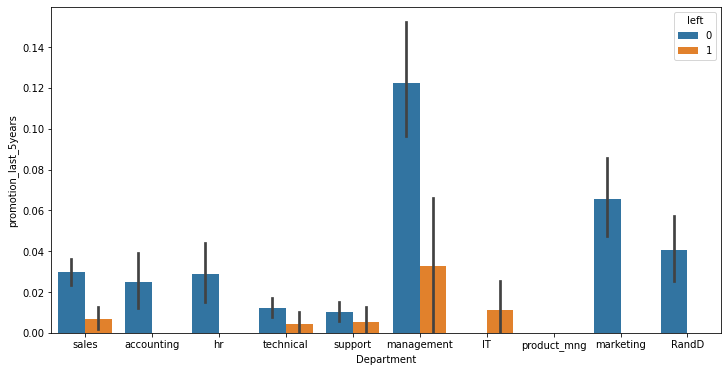

In [49]:
sns.barplot(data=df,x='Department',y='promotion_last_5years',hue='left')

1. Product mng has seen 0 promotions in the past 5 years. However no employee has left on account of this fact.
2. Management has seen the maximum promotions in the past 5 years. 

<b>What is the average satisfaction level across the different salary range? How does this affect employee attrition?

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

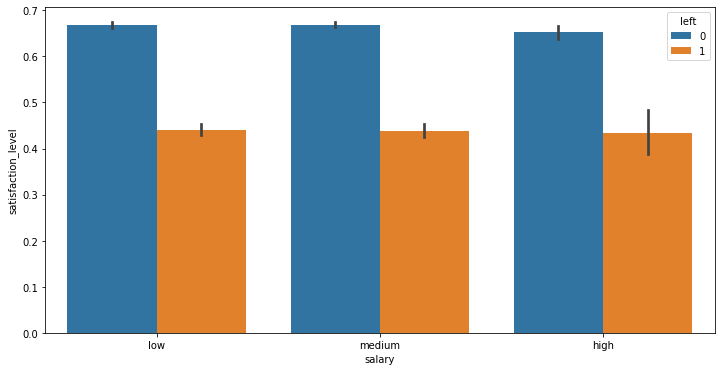

In [50]:
sns.barplot(data=df,x='salary',y='satisfaction_level',hue='left')

Salary does not have an effect on employee satisfaction level for those who left/stayed behind as all of them exihibit similar average of satisfaction levels. 

<b>What is the average performance evaluation scores across the different salary range? How does this affect employee attrition?

<AxesSubplot:xlabel='salary', ylabel='last_evaluation'>

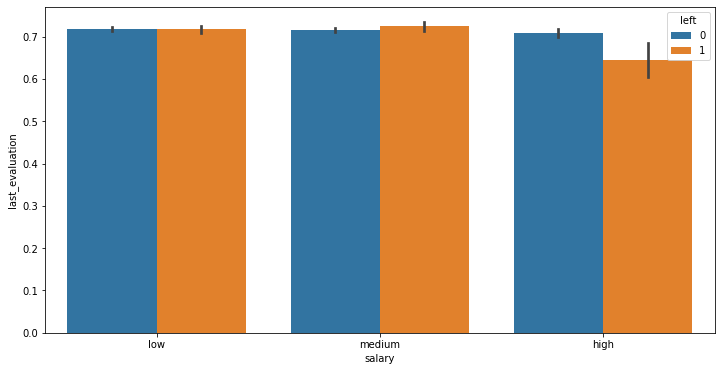

In [51]:
sns.barplot(data=df,x='salary',y='last_evaluation',hue='left')

The last performance evaluation of employees who left with a higher salary range seem to slightly lower than the rest, however no noticeable pattern. 

<b>What is the number of projects handled by different salary groups? How does this affect employee attrition?

<AxesSubplot:xlabel='salary', ylabel='number_project'>

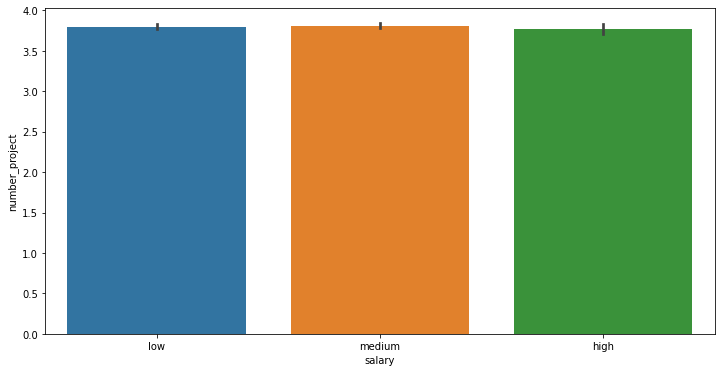

In [52]:
sns.barplot(data=df,x='salary',y='number_project')

No significant pattern observed. Employees of all 3 salary range handle a similar count of project, between 3 to 4. 

<AxesSubplot:xlabel='Department', ylabel='number_project'>

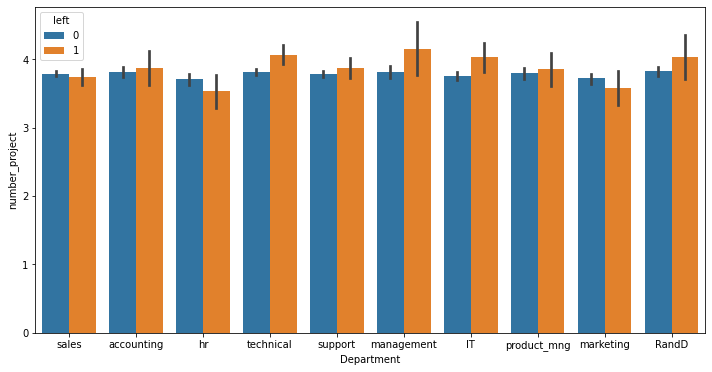

In [53]:
sns.barplot(data=df,x='Department',y='number_project',hue='left')

We observe that in most of the departments, the average number of projects managed by employees who left the organization is slightly greater than those who stayed back. 

<b>What is the average monthly hours per put in my employees of different salary grades? How does this affect employee attrition?

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

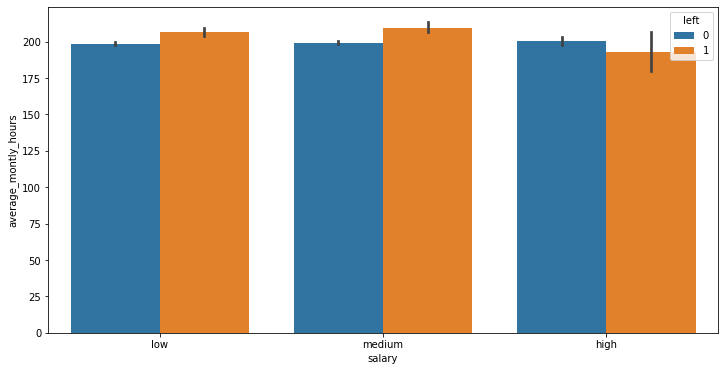

In [54]:
sns.barplot(data=df,x='salary',y='average_montly_hours',hue='left')

No significant pattern observed. Most employees irrespective of salary grades spend around 200hrs monthly. 

<b>What is the average time spent by employees of different salary grades on travelling to office? How does it affect attrition?

<AxesSubplot:xlabel='salary', ylabel='time_spend_company'>

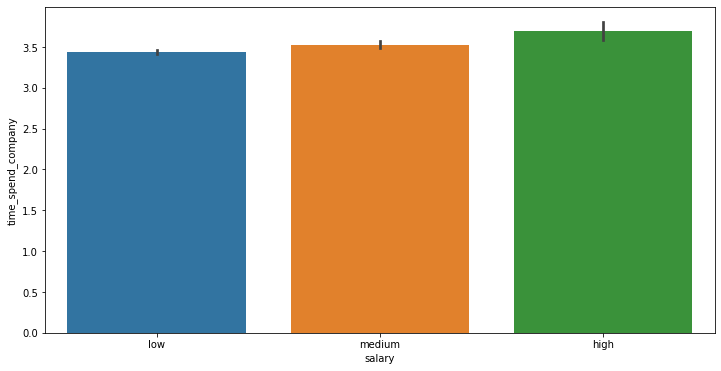

In [55]:
sns.barplot(data=df,x='salary',y='time_spend_company')

<AxesSubplot:xlabel='salary', ylabel='time_spend_company'>

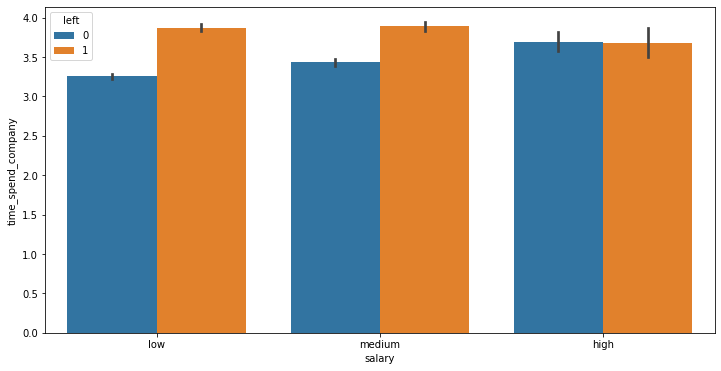

In [56]:
sns.barplot(data=df,x='salary',y='time_spend_company',hue='left')

1. Employees of higher salary grade have a slightly greater average time spent travelling to work. 
2. In both the low and medium salary grades, employees who left travelled longer.

<b>How many employees were invloved in work accidents, salary grade-wise? Did this affect attrition?

<AxesSubplot:xlabel='salary', ylabel='Work_accident'>

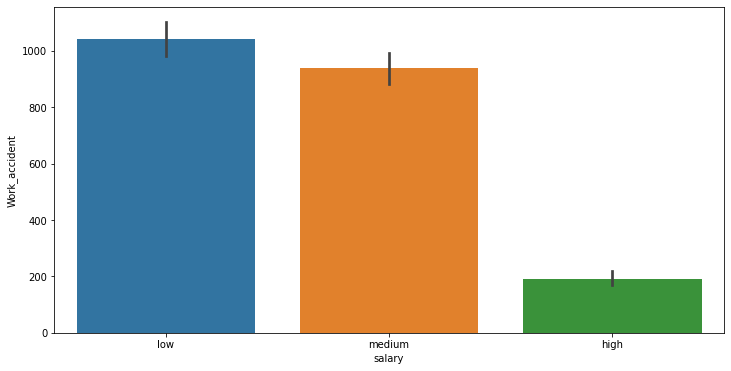

In [57]:
sns.barplot(data=df,x='salary',y='Work_accident',estimator=sum)

<AxesSubplot:xlabel='salary', ylabel='Work_accident'>

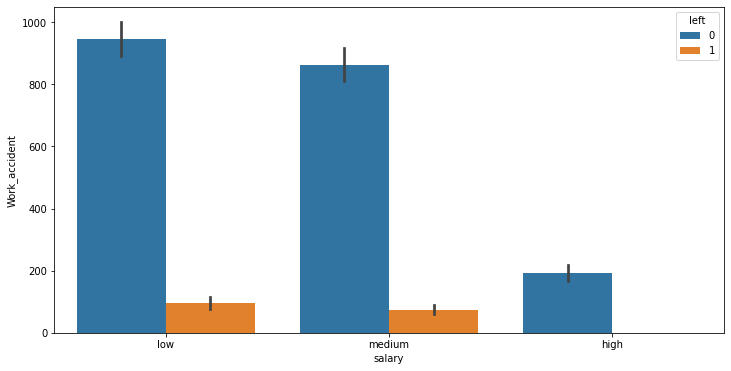

In [58]:
sns.barplot(data=df,x='salary',y='Work_accident',estimator=sum,hue='left')

1. Maximum employees involved in work accidents are from the low salary grade, follwed by medium and then high. 
2. Employees involved in work accidents who left the company are from low and medium salary grade only. Possible inference - employees with higher salary grade have better accident perks

Let's try to understand if there is any correlation, and the type of correlation that exists between Salary grade and the rest of the numberical features. For this, we will have to first encode the salary feature. We will be doing dummy encoding at a later stage, however for ease, let's create a separate dataframe and label encode the feature. 

In [59]:
df_dummy = df

In [60]:
df_dummy['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [61]:
scale_mapper = {"low":1, "medium":2, "high":3}

In [62]:
df_dummy['sal_grade'] = df_dummy['salary'].replace(scale_mapper)

<AxesSubplot:>

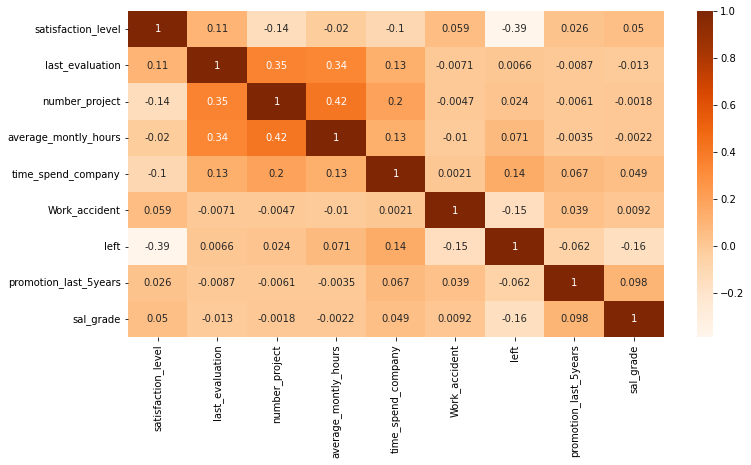

In [63]:
sns.heatmap(df_dummy.corr(),annot=True,cmap='Oranges')

In [64]:
df.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'sal_grade'],
      dtype='object')

<b>How does the satisfaction level of an employee affect his/her performance scores? And vice-versa? 

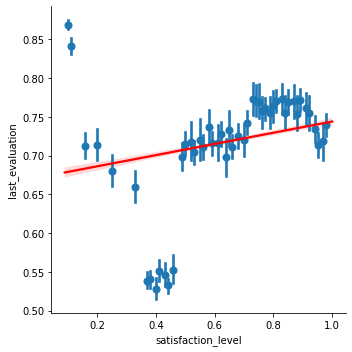

In [65]:
sns.lmplot(data=df,x='satisfaction_level',y='last_evaluation',scatter=True,x_bins=50,line_kws={'color':'red'})

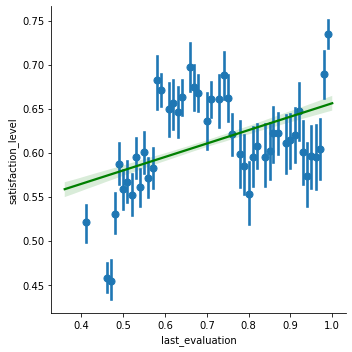

In [66]:
sns.lmplot(data=df,x='last_evaluation',y='satisfaction_level',scatter=True,x_bins=50,line_kws={'color':'green'})

There is a linear relationship between Satisfaction_level and Last_evaluation
1. As the satisfaction_level of employee increase they tend to perform better (less steep)
2. Higher employee performance can create better employee satisfaction (more steep)

<b>How does the satisfaction level of an employee affect the number of projects they are currently working on? And vice-versa? 

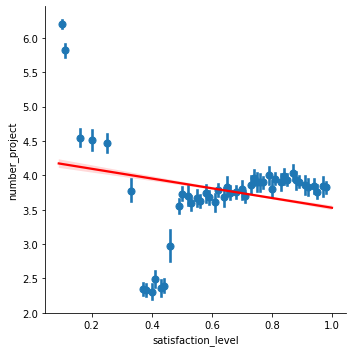

In [67]:
sns.lmplot(data=df,x='satisfaction_level',y='number_project',scatter=True,x_bins=50,line_kws={'color':'red'})

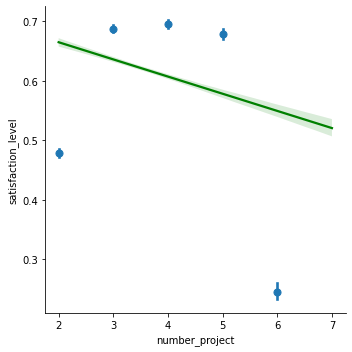

In [68]:
sns.lmplot(data=df,x='number_project',y='satisfaction_level',scatter=True,x_bins=50,line_kws={'color':'green'})

There is a negative linear relationship between Satisfaction_level and number of projects currently managed by an employee,
1. As the number of projects handled goes up there is a decrease in the employee satisfaction levels
2. An employee with lower satisfaction level handles more projects than those with higher satisfaction levels

<b>How does the satisfaction level of an employee affect the average monthly hours an employee puts at work? And vice-versa? 

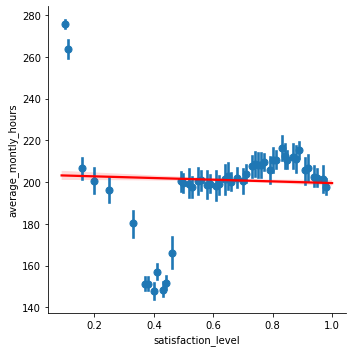

In [69]:
sns.lmplot(data=df,x='satisfaction_level',y='average_montly_hours',x_bins=50,line_kws={'color':'red'})

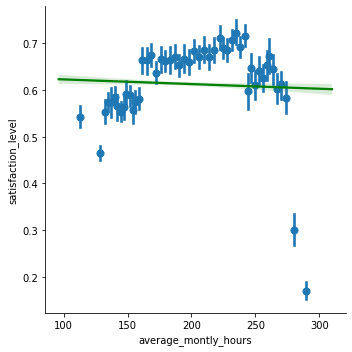

In [70]:
sns.lmplot(data=df,x='average_montly_hours',y='satisfaction_level',x_bins=50,line_kws={'color':'green'})

There is a flat linear relation between satisfaction level and average monthly hours. Satisfaction level does not seem to affect the average monthly hours employee puts into work.

<b>How does the satisfaction level of an employee affect the time employee spends travelling to company? 

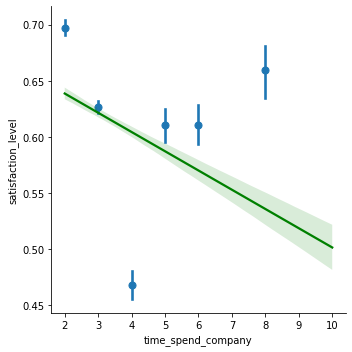

In [71]:
sns.lmplot(data=df,x='time_spend_company',y='satisfaction_level',x_bins=50,line_kws={'color':'green'})

There is a strong negative linear relationship. 
1. When employees spend more time travelling to work, their satisfaction level sees a negative dip. 

<b>Does work accidents affect the satisfaction level of an employee? 

<AxesSubplot:xlabel='Work_accident', ylabel='satisfaction_level'>

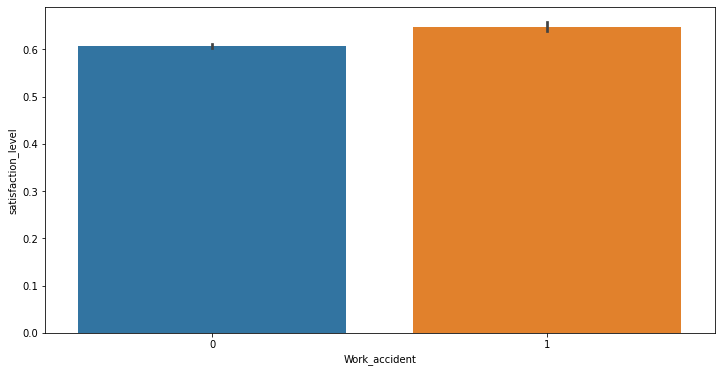

In [72]:
sns.barplot(data=df,x='Work_accident',y='satisfaction_level')

Work accidents do not affect employee satisfaction levels. 

<b>Does promotions in the previous 5 years have a positive or a negative effect on employee satisfaction levels?

In [73]:
df.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'sal_grade'],
      dtype='object')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

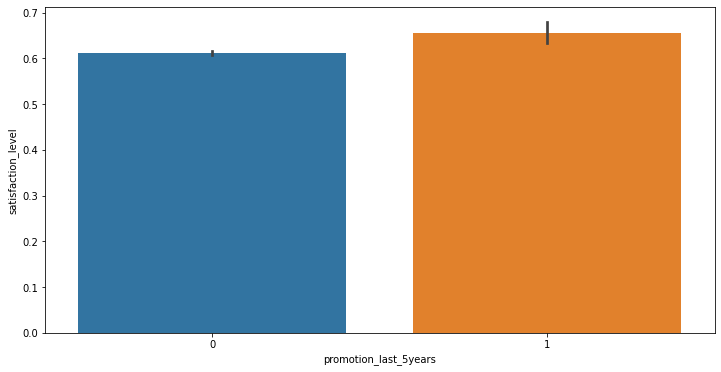

In [74]:
sns.barplot(data=df,x='promotion_last_5years',y='satisfaction_level')

Employees with promotions in the last 5 years have a slighly higher satisfaction level than those without a promotion. 

<b>Does the number of projects handled by employees affect their performance scores? And vice-versa? 

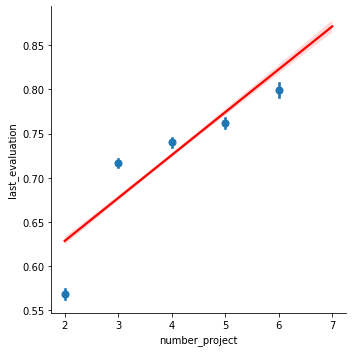

In [75]:
sns.lmplot(data=df,x='number_project',y='last_evaluation',x_bins=50,line_kws={'color':'red'})

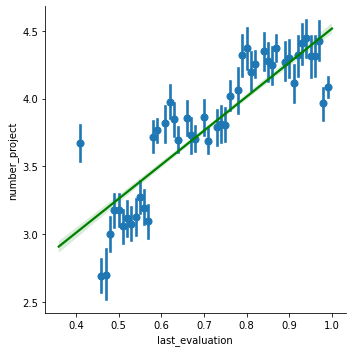

In [76]:
sns.lmplot(data=df,x='last_evaluation',y='number_project',x_bins=50,line_kws={'color':'green'})

There is a strong linear relationship. 
1. Looks like as the employees handled more projects, their performance evaluation scores increased. 
2. With increase in performance eval score, employees got to handle more current projects 

<b>Does the average number of hours employees work in a month affect their performance scores? And vice-versa? 

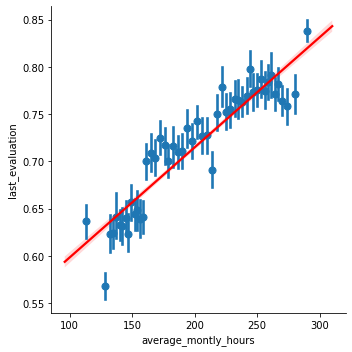

In [77]:
sns.lmplot(data=df,x='average_montly_hours',y='last_evaluation',line_kws={'color':'red'},x_bins=50)

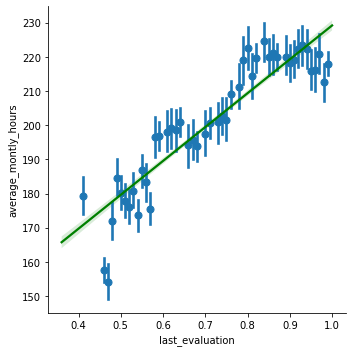

In [78]:
sns.lmplot(data=df,x='last_evaluation',y='average_montly_hours',line_kws={'color':'green'},x_bins=50) 

There is a linear relationship,
1. Employees who's performance scores are higher tend to spend more time at the company. 
2. Employees who spend more time at the company had higher performance scores. (Hope that's not a bias)

<b>Does the travelling time of an employee affect their performance at the company? 

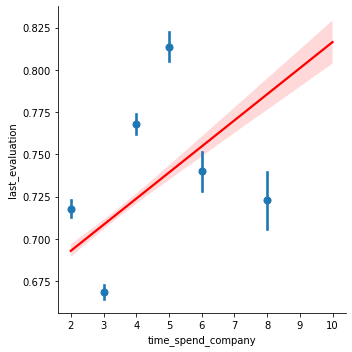

In [79]:
sns.lmplot(data=df,x='time_spend_company',y='last_evaluation',x_bins=50,line_kws={'color':'red'})

We observe a linear relationship, 
1. As the time spend traevlling to company increases employees seem to have better performance ratings however, this does not account for the actual count of employees for whom the criteria is satisfied. 
We find that off 500+ employees with travel time above 6hrs, more than 50% of them have higher performance rating. The linear relationship is a cause of the low sample size. 

<b>How has work accidents impacted employee performance scores? 

<AxesSubplot:xlabel='Work_accident', ylabel='last_evaluation'>

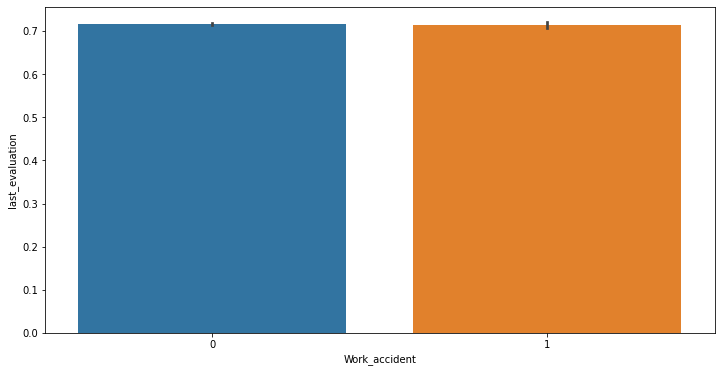

In [80]:
sns.barplot(data=df,x='Work_accident',y='last_evaluation')

There is no impact of work accidents on employee last evaluation scores. 

<b>Has promotion in the last 5 years positively affected employee performance? (Motivation)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='last_evaluation'>

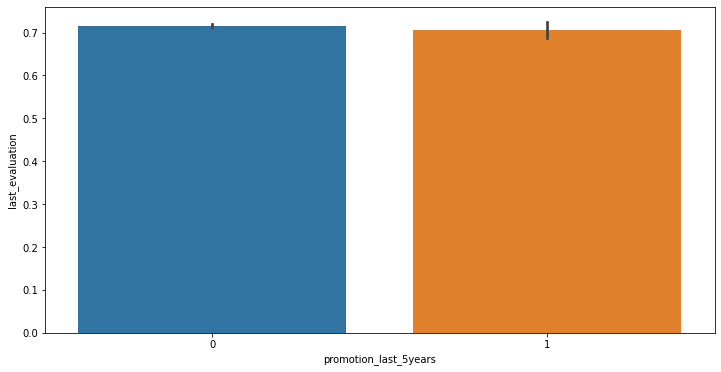

In [81]:
sns.barplot(data=df,x='promotion_last_5years',y='last_evaluation')

In [82]:
df[df['promotion_last_5years']==1]['last_evaluation'].describe()

count    319.000000
mean       0.706019
std        0.169632
min        0.370000
25%        0.575000
50%        0.710000
75%        0.840000
max        1.000000
Name: last_evaluation, dtype: float64

There is no noticeable effect of promotion in the last 5 years on employee evaluation scores. 

<b>Does the number of projects managed by employees affect the average number of hours they work? and vice-versa

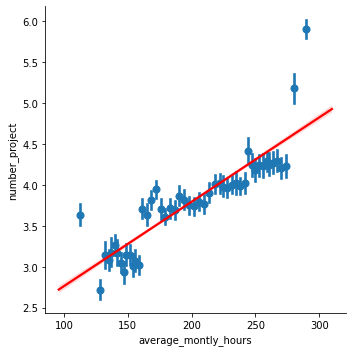

In [83]:
sns.lmplot(data=df,x='average_montly_hours',y='number_project',line_kws={'color':'red'},x_bins=50)

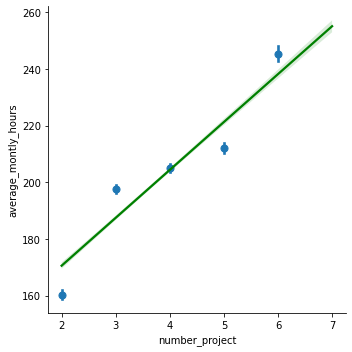

In [84]:
sns.lmplot(data=df,x='number_project',y='average_montly_hours',line_kws={'color':'green'},x_bins=50)

There is a positive linear relationship,
1. Employees who have spent more number of hours working have worked on greater number of projects
2. Employees who work on more number of projects have worked longer hours

<b>Does the amount of time spend by employees travelling to company affect the number of projects they handle?

<AxesSubplot:xlabel='time_spend_company', ylabel='number_project'>

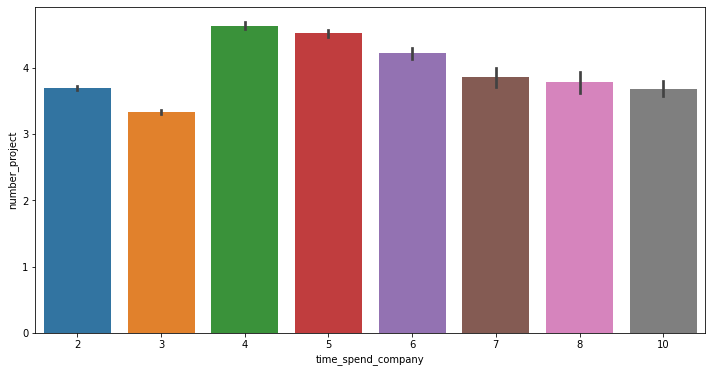

In [85]:
sns.barplot(data=df,x='time_spend_company',y='number_project')

There is less than noticeable relation between the time spend travelling to a company and the number of projects handled. It can be observed however that employees who travelled around 4 hours in transit handled more projects than the rest. (Could be irrelevant)

<b>Do accidents at workplace affect the number of projects that are handled by an employee?

<AxesSubplot:xlabel='Work_accident', ylabel='number_project'>

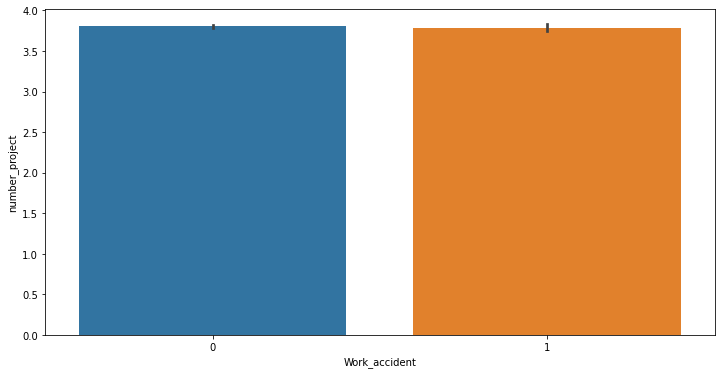

In [86]:
sns.barplot(data=df,x='Work_accident',y='number_project')

Seems not. Irrespective of work accidents, employees seem to have handled around 3-4 projects on an average. 

<b>Does being promoted in the past 5years increase the number of projects that employees took up?

<AxesSubplot:xlabel='promotion_last_5years', ylabel='number_project'>

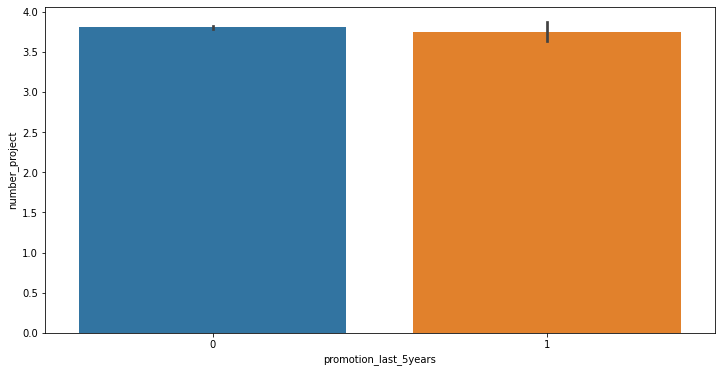

In [87]:
sns.barplot(data=df,x='promotion_last_5years',y='number_project')

Again, no noticeable patterns. With or without promotion, employees have handled 3-4 projects on average. 

<b>Do employees who travel more number of hours to company spend more or less time working at the company?

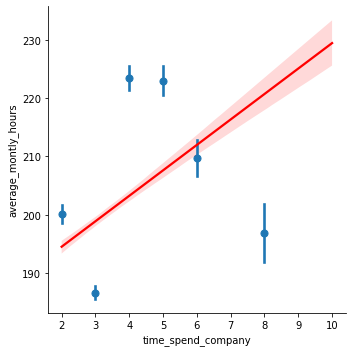

In [88]:
sns.lmplot(data=df,x='time_spend_company',y='average_montly_hours',line_kws={'color':'red'},x_bins=50)

Employees who spend more time travelling spend relatively longer hours working at the company. 

<b>Is the average monthly hours of work of employees impacted by work accidents?

<AxesSubplot:xlabel='Work_accident', ylabel='average_montly_hours'>

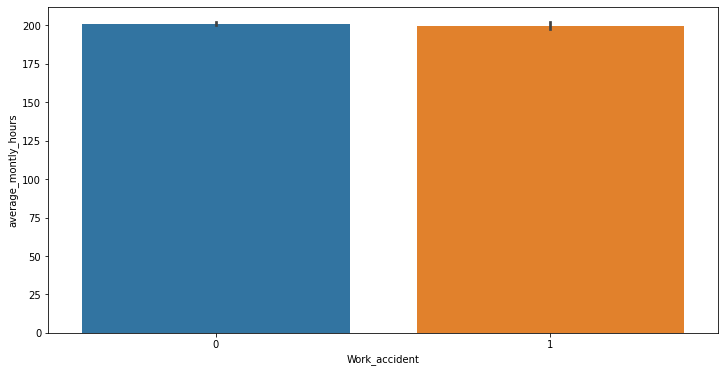

In [89]:
sns.barplot(data=df,x='Work_accident',y='average_montly_hours')

On an average, employees spend about 200 hours monthly irrespective of work accidents. 

<b>Does working more hours at the company help in achieving promotion ? 

<AxesSubplot:xlabel='promotion_last_5years', ylabel='average_montly_hours'>

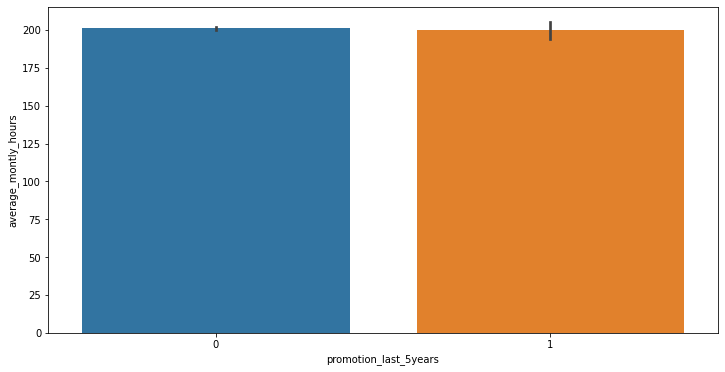

In [90]:
sns.barplot(data=df,x='promotion_last_5years',y='average_montly_hours')

On an average, employees spend about 200 hours monthly irrespective of promotions. 

<b>How many employees who have had work accidents were promoted in the past 5 years?

In [91]:
len(df[df['Work_accident']==1][df['promotion_last_5years']==1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


76

In [92]:
len(df[df['Work_accident']==1])

2169

A total of 2169 employees have had work accidents, but only 76 of them were promoted in the last 5 years. (Irrelevant maybe.)

## Multivariate Analysis 

Let's see how the bivariate analysis exhibits patterns when we check with employee attrition. I will not draw inferences for each of the following plots, as they are similar to the bivariate analysis. The plot on the 1st column represents patterns for employees who stayed while column 2 represents employees who left. 

<b>What is the relation between last evaluation scores, employee satisfaction levels and attrition?

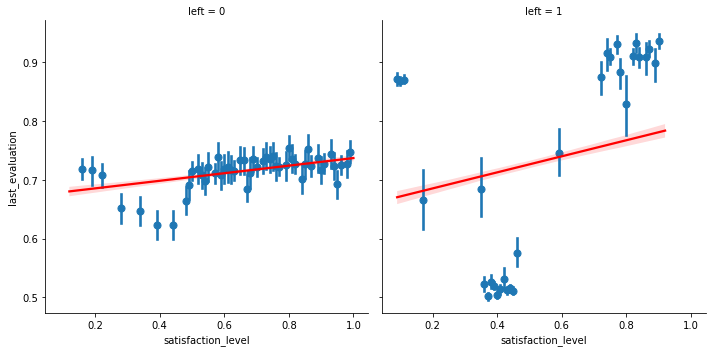

In [93]:
sns.lmplot(data=df,x='satisfaction_level',y='last_evaluation',scatter=True,x_bins=50,line_kws={'color':'red'},col='left')

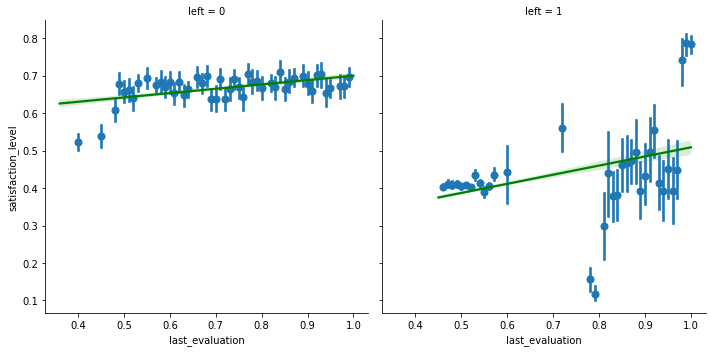

In [94]:
sns.lmplot(data=df,x='last_evaluation',y='satisfaction_level',scatter=True,x_bins=50,line_kws={'color':'green'},col='left')

In those employees who left, the satisfaction levels were higher at better performance ratings. This can indicate that the company lacks career growth opportunities.

<b>What is the relation between number of current projects, employee satisfaction levels and attrition?

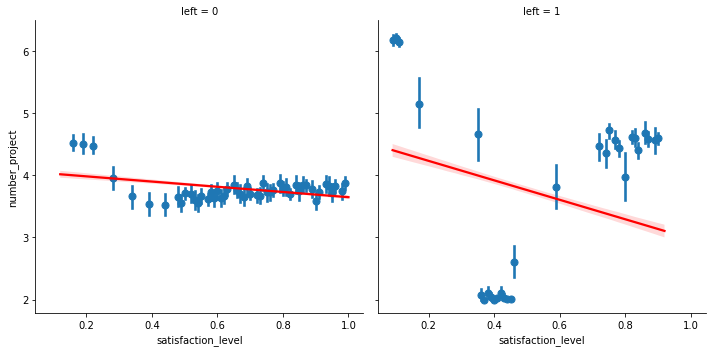

In [95]:
sns.lmplot(data=df,x='satisfaction_level',y='number_project',scatter=True,x_bins=50,line_kws={'color':'red'},col='left')

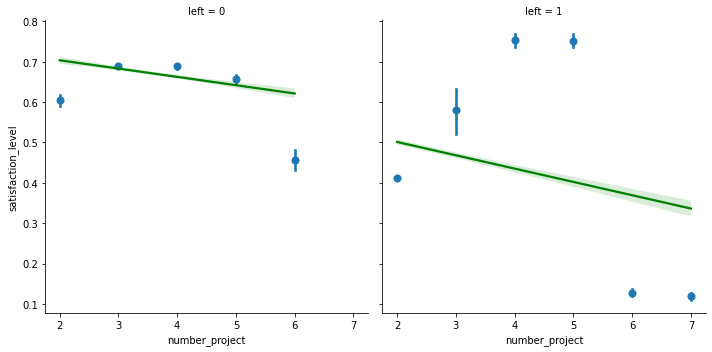

In [96]:
sns.lmplot(data=df,x='number_project',y='satisfaction_level',scatter=True,x_bins=50,line_kws={'color':'green'},col='left')

As the number of projects increases, the employee satisfaction levels have seena  steep decline, especially in the employees who left the organization. Indicating that it is a strong influencing factor on attrition.

<b>What is the relation between satisfaction_level, average_montly_hours and attrition?

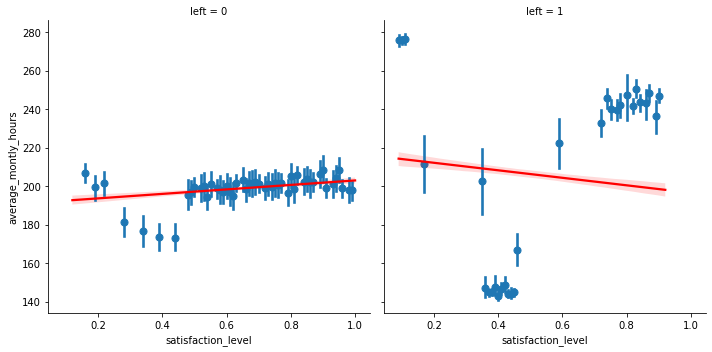

In [97]:
sns.lmplot(data=df,x='satisfaction_level',y='average_montly_hours',x_bins=50,line_kws={'color':'red'},col='left')

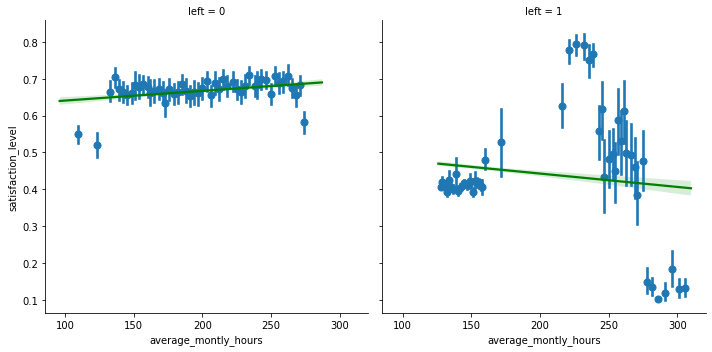

In [98]:
sns.lmplot(data=df,x='average_montly_hours',y='satisfaction_level',x_bins=50,line_kws={'color':'green'},col='left')

In employees who stayed, there was a slight increase in satisfaction levels with increase in the average monthly work hours whereas we observe that there was a drop in the satisfaction levels when the average monthly hours went up in employees who left. 

<b>What is the relation between time spend travelling to company, employee satisfaction level and attrition?

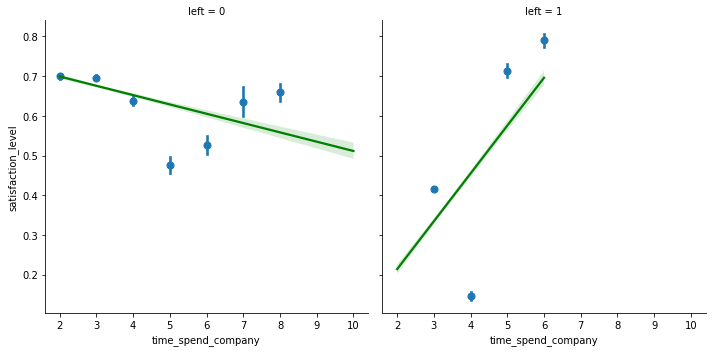

In [99]:
sns.lmplot(data=df,x='time_spend_company',y='satisfaction_level',x_bins=50,line_kws={'color':'green'},col='left')

1. In employees who stayed, there is a decline in satisfaction levels with increase in time spent travelling 
2. On the contrary, there is an increase in the satisfaction levels with increase in time spent travelling for employees who left. 

<b>What is the relation between satisfaction_level, work accidents and attrition?

<AxesSubplot:xlabel='Work_accident', ylabel='satisfaction_level'>

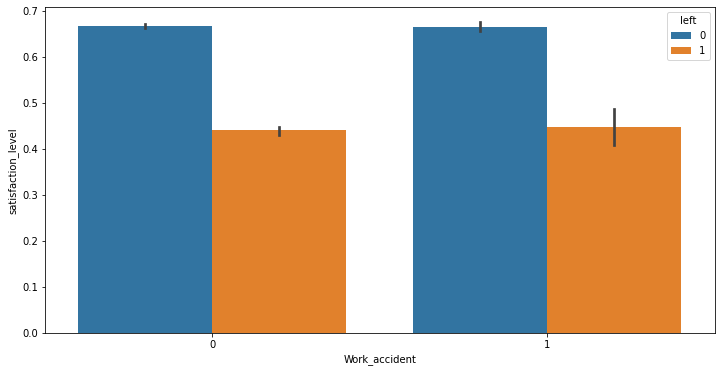

In [100]:
sns.barplot(data=df,x='Work_accident',y='satisfaction_level',hue='left')

No differentiable relationship can be derived between work accidents, satisfaction level and attrition. 

<b>What is the relation between satisfaction_level, employee promotion in the last 5 years and attrition?

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

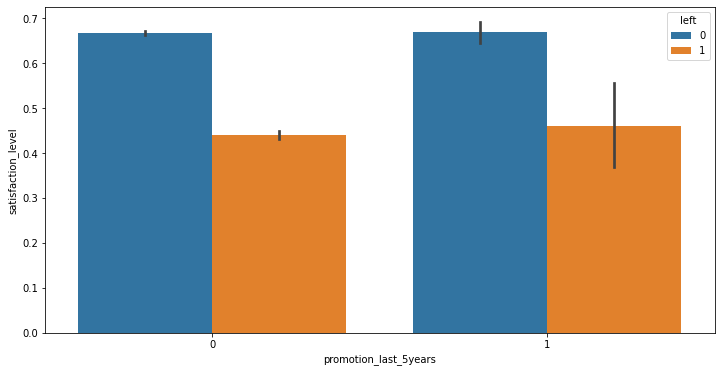

In [101]:
sns.barplot(data=df,x='promotion_last_5years',y='satisfaction_level',hue='left')

No differentiable relationship can be derived between promotion in the past 5 years, satisfaction level and attrition. 

<b>What is the relation between number of current projects handled, last evaluation scores and attrition?

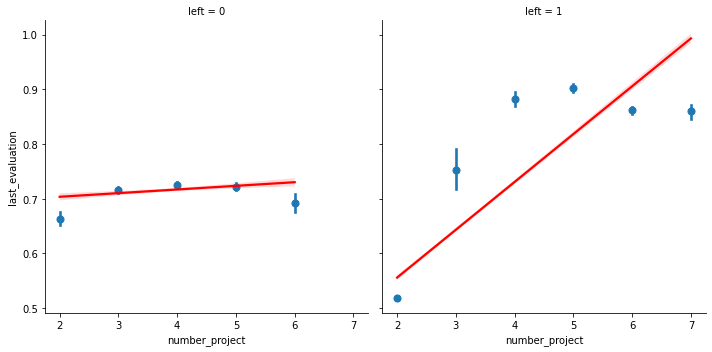

In [102]:
sns.lmplot(data=df,x='number_project',y='last_evaluation',x_bins=50,line_kws={'color':'red'},col='left')

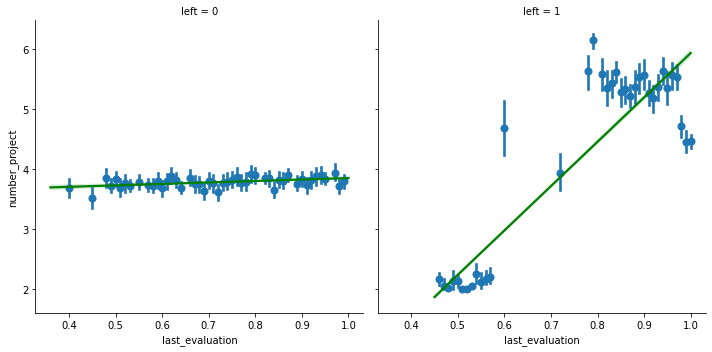

In [103]:
sns.lmplot(data=df,x='last_evaluation',y='number_project',x_bins=50,line_kws={'color':'green'},col='left')

1. In employees who stayed, the evaluation scores and the number of projects handled has remained fairly constant. 
2. In employees who left, as the evaluation scores have gone up, they have handled more projects. Attrition could be a cause of lack of appreciation.

<b>What is the relation between last evaluation scores, average_montly_hours and attrition?

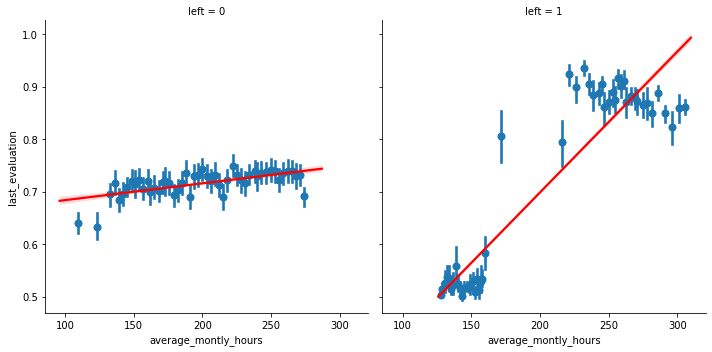

In [104]:
sns.lmplot(data=df,x='average_montly_hours',y='last_evaluation',line_kws={'color':'red'},x_bins=50,col='left')

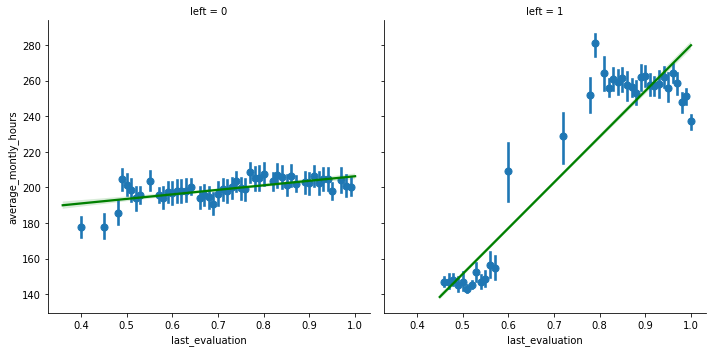

In [105]:
sns.lmplot(data=df,x='last_evaluation',y='average_montly_hours',line_kws={'color':'green'},x_bins=50,col='left') 

Employees who left worked longer hours and exhibit higher evaluation scores. As stated earlier, lack of appreciation seems to be a strong possibility for attrition.

<b>What is the relation between time spend travelling to company, last evaluation scores and attrition?

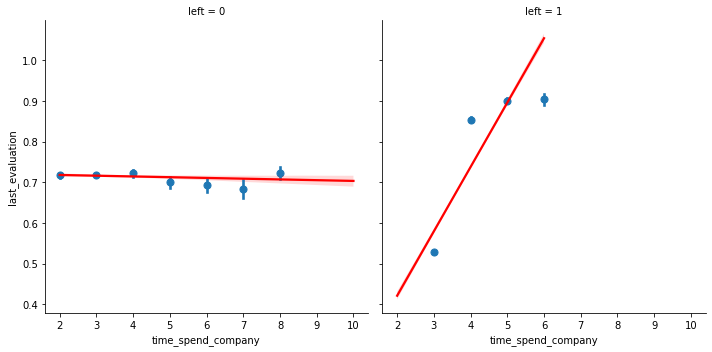

In [106]:
sns.lmplot(data=df,x='time_spend_company',y='last_evaluation',x_bins=50,line_kws={'color':'red'},col='left')

1. Employees who stayed seem to have fairly constant last evaluation scores irrespective of time spent travelling
2. Employees who left have higher performance scores with increase in the time spent travelling to company. 

<b>What is the relation between work accidents, last evaluation scores and attrition?

<AxesSubplot:xlabel='Work_accident', ylabel='last_evaluation'>

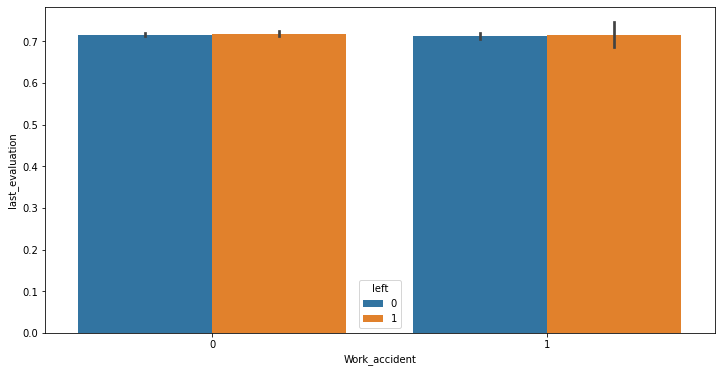

In [107]:
sns.barplot(data=df,x='Work_accident',y='last_evaluation',hue='left')

No noticeable pattern found.

<b>What is the relation between promotion in the last 5 years, last evaluation scores and attrition?

<AxesSubplot:xlabel='promotion_last_5years', ylabel='last_evaluation'>

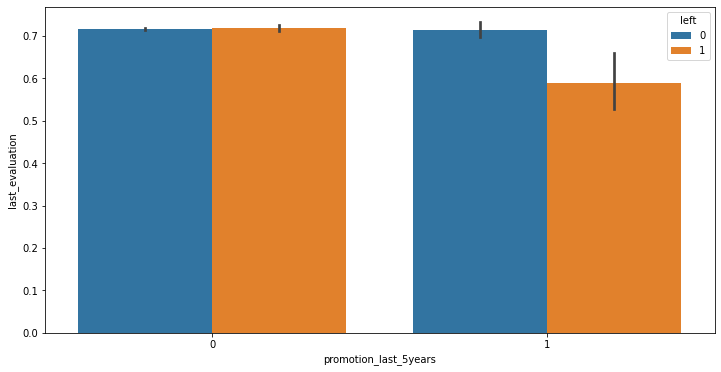

In [108]:
sns.barplot(data=df,x='promotion_last_5years',y='last_evaluation',hue='left')

Employees who left despite their promotions have had a slightly lower last evaluation score.

<b>What is the relation between average monthly work hours, number of current projects and attrition?

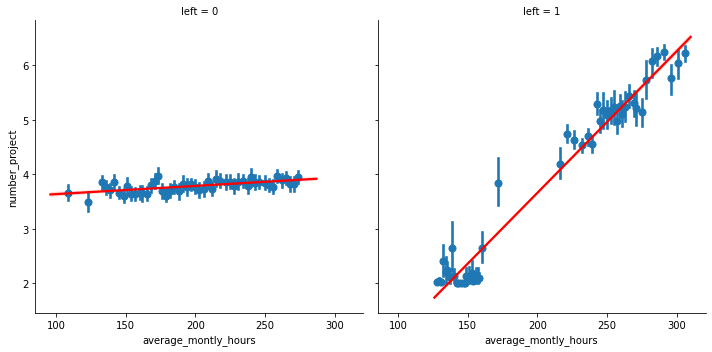

In [109]:
sns.lmplot(data=df,x='average_montly_hours',y='number_project',line_kws={'color':'red'},x_bins=50,col='left')

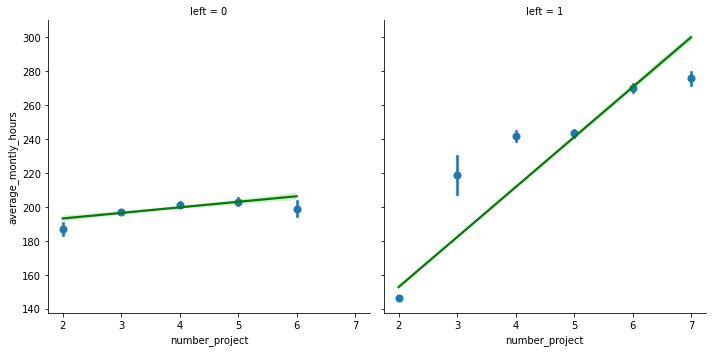

In [110]:
sns.lmplot(data=df,x='number_project',y='average_montly_hours',line_kws={'color':'green'},x_bins=50,col='left')

1. In employees who left, there is a steep rise in the number of hours spent at the company working with increase in the number of projects handled.
2. In employees who stayed, we similar pattern however the average monthly hours is not a steep rise. 

<b>What is the relation between time spend travelling to company, number of projects handled and attrition?

<AxesSubplot:xlabel='time_spend_company', ylabel='number_project'>

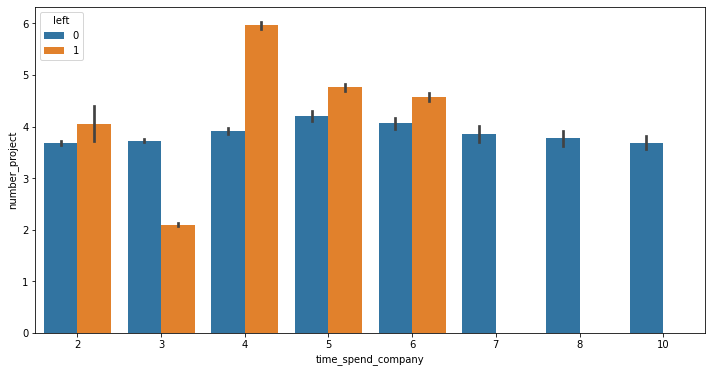

In [111]:
sns.barplot(data=df,x='time_spend_company',y='number_project',hue='left')

Employees who spent 4 hours travelling but managed 6 projects or more were the most to leave. 

<b>What is the relation between work accidents, number of projects handled and attrition?

<AxesSubplot:xlabel='Work_accident', ylabel='number_project'>

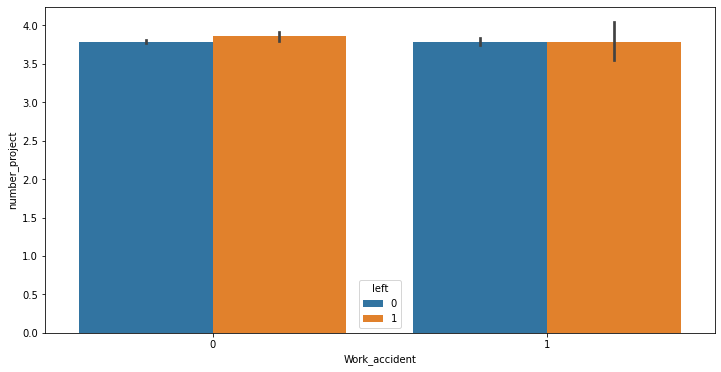

In [112]:
sns.barplot(data=df,x='Work_accident',y='number_project',hue='left')

No noticeable differences found.

<b>What is the relation between promotion in the past 5 years, number of projects handled and attrition?

<AxesSubplot:xlabel='promotion_last_5years', ylabel='number_project'>

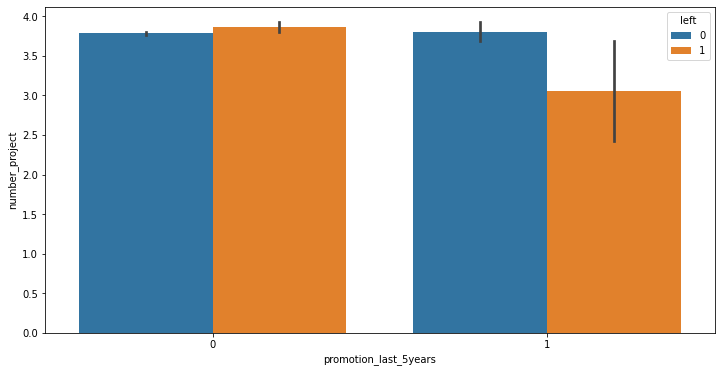

In [113]:
sns.barplot(data=df,x='promotion_last_5years',y='number_project',hue='left')

Employees promoted in the last 5 years, but left the company have comparatively managed lesser number of projects than ones who stayed or were not promoted. 

<b>What is the relation between time spend travelling to company, average_montly_hours and attrition?

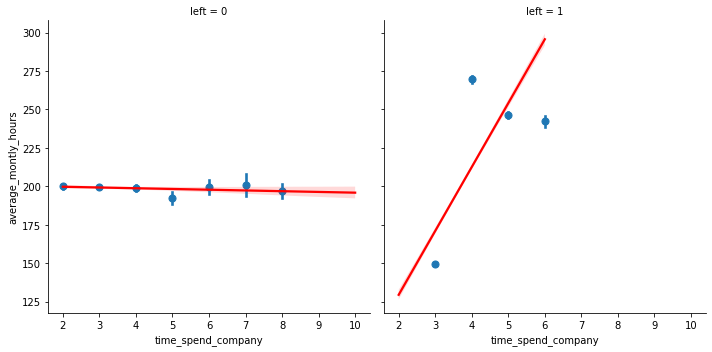

In [114]:
sns.lmplot(data=df,x='time_spend_company',y='average_montly_hours',line_kws={'color':'red'},x_bins=50,col='left')

1.  We observe in employees who left, not only spent more time travelling but also worked longer hours in company.

<b>What is the relation between work accidents, average_montly_hours and attrition?

<AxesSubplot:xlabel='Work_accident', ylabel='average_montly_hours'>

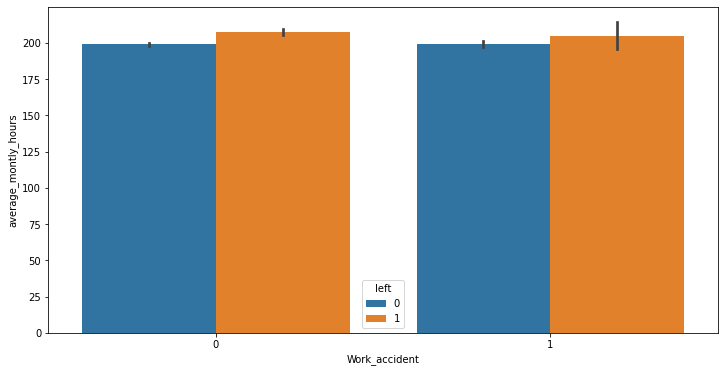

In [115]:
sns.barplot(data=df,x='Work_accident',y='average_montly_hours',hue='left')

No noticeable differences found.

<b>What is the relation between promotion in the past 5 years, average_montly_hours and attrition?

<AxesSubplot:xlabel='promotion_last_5years', ylabel='average_montly_hours'>

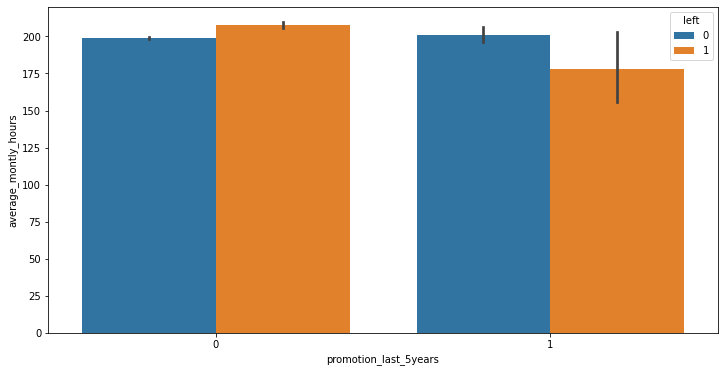

In [116]:
sns.barplot(data=df,x='promotion_last_5years',y='average_montly_hours',hue='left')

Employees promoted in the last 5 years, but left the company have comparatively spent lesser time working than ones who stayed or were not promoted. 

In [117]:
df.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'sal_grade'],
      dtype='object')

In [118]:
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,sal_grade
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low,1


# Feature Engineering

## Imputation - Handle null/NA values

In [119]:
df.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
sal_grade                0
dtype: int64

There are no null values to be handled. 

## Handle Outliers

As we saw earlier, outliers are in,
1. time_spend_company - values of 6,7,8,10 need to be handled for better modelling. <br>
<b>Outlier handling:</b> We will replace it with mode (most frequent travel time) to avoid continuous values. 

In [120]:
df['time_spend_company'].mode()

0    3
dtype: int64

In [121]:
def replace_outliers(i):
    if i>=6:
        return 3
    else:
        return i

In [122]:
df['time_spend_company'] = df['time_spend_company'].apply(replace_outliers)

In [123]:
return_outliers(df['time_spend_company'])

[]

<AxesSubplot:xlabel='time_spend_company'>

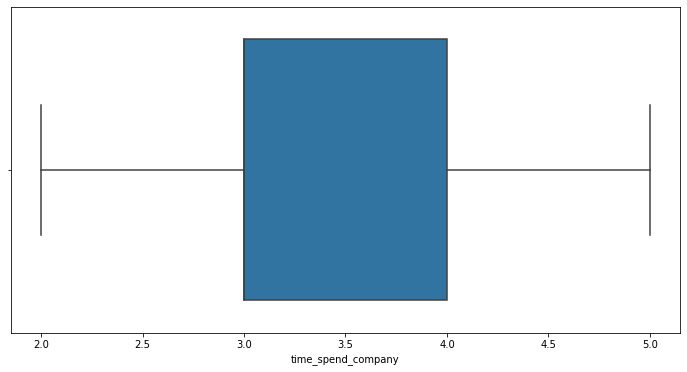

In [124]:
sns.boxplot(data=df,x='time_spend_company')

## Binning 

We shall avoid binning for this dataset as there are only about 15k records which is not a lot of data points. Binning is the practice of grouping continuous data in discrete variable data. In this case, we shall skip it.

## Dropping Columns

Let's drop the following columns,
1. EmpID - irrelevant. Used to identify the record only.
2. salary - Redundant. We have created the sal_grade feature which is numerical.

In [125]:
df.drop(columns=['Emp_Id','salary'],inplace=True)

## Encoding

We will create dummy variables for the following column,
1. Department

In [126]:
df = pd.get_dummies(data=df,columns=['Department'],drop_first=True)

# Modelling

## Train - Test Split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X = df.drop('left',axis=1)

In [129]:
y = df['left']

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

## Handling Imbalanced Dataset

In [131]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

The data is imbalanced. Employees who stayed are far greater than those who left. We should handle this imbalanced data. 
<br>
We will use SMOTE - Synthetic Minority Oversampling Technique for creating synthetic datapoints for the minority class. SMOTE is however applied on the train-test split. 



In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [134]:
y_train.value_counts()

0    8589
1    8589
Name: left, dtype: int64

Dataset is balanced. 

## Feature Scaling

Features are of different measure units. We will scale them for uniformity. This will not have much effect in boosting, but since we will be using KNN and SVM, we will scale the data.

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()

In [137]:
X_train = scaler.fit_transform(X_train)

In [138]:
X_test = scaler.transform(X_test)

# Modelling & Hyperparameter Tuning

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")
result = pd.DataFrame(columns=['Model','Accuracy Score'])

## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = np.logspace(-4, 4, 50)
solver = ['lbfgs','newton-cg','liblinear','sag','saga']
max_iter =  [100,500, 1000,2000, 5000]
logR_hyperparameters = dict(penalty=penalty, C=C, solver=solver, max_iter=max_iter)
logR_gridSearch = RandomizedSearchCV(logR,param_distributions=logR_hyperparameters,cv=3,verbose=1)
logR_gridSearch.fit(X_train,y_train)
logR_y_pred = logR_gridSearch.predict(X_test)
print('Logistic Regression')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,logR_y_pred))
print('\n Classification Report')
print(classification_report(y_test,logR_y_pred))
logR_AS = accuracy_score(y_test,logR_y_pred)
result.loc[0] = ['Logistic Regression',logR_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Logistic Regression

 Confusion Matrix
[[2287  552]
 [ 153  758]]

 Classification Report
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2839
           1       0.58      0.83      0.68       911

    accuracy                           0.81      3750
   macro avg       0.76      0.82      0.77      3750
weighted avg       0.85      0.81      0.82      3750



## Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
max_depth = list(range(10,100,10))
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt']
max_depth = list(range(10,100,10))
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = list(range(200,2000,200))
bootstrap = [True, False]
rfc_hyperparameters = dict(max_depth = max_depth, criterion = criterion, max_features = max_features, min_samples_leaf = min_samples_leaf, n_estimators = n_estimators, bootstrap = bootstrap)
rfc_gridSearch = RandomizedSearchCV(rfc,param_distributions=rfc_hyperparameters,cv=3,verbose=1)
rfc_gridSearch.fit(X_train,y_train)
rfc_y_pred = rfc_gridSearch.predict(X_test)
print('Random Forest Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,rfc_y_pred))
print('\n Classification Report')
print(classification_report(y_test,rfc_y_pred))
rfc_AS = accuracy_score(y_test,rfc_y_pred)
result.loc[1] = ['Random Forest',rfc_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Classifier

 Confusion Matrix
[[2825   14]
 [  42  869]]

 Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2839
           1       0.98      0.95      0.97       911

    accuracy                           0.99      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.99      0.99      0.98      3750



## K Nearest Neighbours Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
weights = ['uniform','distance']
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
metric = ['minkowski','euclidean','manhattan']
algorithm=['auto']
p=[1,2]
knn_hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size, p=p, metric=metric)
KNN_gridSearch = RandomizedSearchCV(knn,param_distributions=knn_hyperparameters,cv=3,verbose=1)
KNN_gridSearch.fit(X_train,y_train)
knn_y_pred = KNN_gridSearch.predict(X_test)
print('KNN Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,knn_y_pred))
print('\n Classification Report')
print(classification_report(y_test,knn_y_pred))
KNN_AS = accuracy_score(y_test,knn_y_pred)
result.loc[2] = ['KNN',KNN_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
KNN Classifier

 Confusion Matrix
[[2685  154]
 [  47  864]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2839
           1       0.85      0.95      0.90       911

    accuracy                           0.95      3750
   macro avg       0.92      0.95      0.93      3750
weighted avg       0.95      0.95      0.95      3750



## Decision Tree Classifier 

In [143]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
criterion=['gini','entropy']
splitter=['best', 'random']
max_depth = list(range(10,100,10))
min_samples_split = [2, 5, 10]
max_features = ['auto', 'sqrt','log2',None]
max_depth = list(range(10,100,10))
min_samples_leaf = [1, 2, 4]
dtc_hyperparameters = dict(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, max_features=max_features, min_samples_leaf=min_samples_leaf)
dtc_gridSearch = RandomizedSearchCV(dtc,param_distributions=dtc_hyperparameters,cv=3,verbose=1)
dtc_gridSearch.fit(X_train,y_train)
dtc_y_pred = dtc_gridSearch.predict(X_test)
print('Decision Tree Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,dtc_y_pred))
print('\n Classification Report')
print(classification_report(y_test,dtc_y_pred))
dtc_AS = accuracy_score(y_test,dtc_y_pred)
result.loc[3] = ['Decision Tree',dtc_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree Classifier

 Confusion Matrix
[[2760   79]
 [  66  845]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2839
           1       0.91      0.93      0.92       911

    accuracy                           0.96      3750
   macro avg       0.95      0.95      0.95      3750
weighted avg       0.96      0.96      0.96      3750



## Gradient Boost Classifier

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
learning_rate=[1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators=[1, 2, 4, 8, 16, 32, 64, 128, 256,512]
min_samples_split=list(range(1,10,1))
min_samples_leaf=list(range(1,10,1))
max_depth=list(range(1,32,1))
GBC_hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
GBC_gridSearch = RandomizedSearchCV(GBC,param_distributions=GBC_hyperparameters,cv=3,verbose=1)
GBC_gridSearch.fit(X_train,y_train)
GBC_y_pred = GBC_gridSearch.predict(X_test)
print('Gradient Boosting Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,GBC_y_pred))
print('\n Classification Report')
print(classification_report(y_test,GBC_y_pred))
GBC_AS = accuracy_score(y_test,GBC_y_pred)
result.loc[4] = ['Gradient Boost',GBC_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Gradient Boosting Classifier

 Confusion Matrix
[[2819   20]
 [  45  866]]

 Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2839
           1       0.98      0.95      0.96       911

    accuracy                           0.98      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.98      0.98      0.98      3750



## XGBoost Classifier

In [145]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
max_depth = [3,6,9,12,15]
learning_rate = [0.01,0.03,0.06,0.1,0.15,0.2,0.25,0.3, 0.4,0.5,0.6,0.7,0.8,0.9]
n_estimators = list(range(100,1000,100))
reg_alpha = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
reg_lambda = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
gamma = [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,204.8]
booster =  ['gbtree', 'gblinear']
XGBC_hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, reg_alpha=reg_alpha, reg_lambda=reg_lambda, gamma=gamma, booster=booster)
XGBC_gridSearch = RandomizedSearchCV(XGBC,param_distributions=XGBC_hyperparameters,cv=3,verbose=1)
XGBC_gridSearch.fit(X_train,y_train)
XGBC_y_pred = XGBC_gridSearch.predict(X_test)
print('Extreme Gradient Boosting Classifier (XGBC)')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,XGBC_y_pred))
print('\n Classification Report')
print(classification_report(y_test,XGBC_y_pred))
XGBC_AS = accuracy_score(y_test,XGBC_y_pred)
result.loc[5] = ['XGBoost',XGBC_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[08:46:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

## AdaBoost Classifier

In [146]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier()
n_estimators = list(range(100,2000,100))
learning_rate = [0.01,0.03,0.06,0.1,0.15,0.2,0.25,0.3, 0.4,0.5,0.6,0.7,0.8,0.9]
Ada_hyperparameters = dict(n_estimators=n_estimators, learning_rate=learning_rate)
Ada_gridSearch = RandomizedSearchCV(Ada,param_distributions=Ada_hyperparameters,cv=3,verbose=1)
Ada_gridSearch.fit(X_train,y_train)
Ada_y_pred = Ada_gridSearch.predict(X_test)
print('AdaBoost Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,Ada_y_pred))
print('\n Classification Report')
print(classification_report(y_test,Ada_y_pred))
Ada_AS = accuracy_score(y_test,Ada_y_pred)
result.loc[6] = ['AdaBoost',Ada_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
AdaBoost Classifier

 Confusion Matrix
[[2696  143]
 [  89  822]]

 Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2839
           1       0.85      0.90      0.88       911

    accuracy                           0.94      3750
   macro avg       0.91      0.93      0.92      3750
weighted avg       0.94      0.94      0.94      3750



## CatBoost Classifier

In [147]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
depth = [4,5,6,7,8,9,10]
learning_rate =  [0.01,0.03,0.06,0.1,0.15,0.2,0.25,0.3, 0.4,0.5,0.6,0.7,0.8,0.9]
iterations = list(range(10,200,10))
cat_hyperparameters = dict(depth=depth, learning_rate=learning_rate, iterations=iterations)
cat_gridSearch = RandomizedSearchCV(cat,param_distributions=cat_hyperparameters,cv=3,verbose=1)
cat_gridSearch.fit(X_train,y_train)
cat_y_pred = cat_gridSearch.predict(X_test)
print('CatBoost Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,cat_y_pred))
print('\n Classification Report')
print(classification_report(y_test,cat_y_pred))
cat_AS = accuracy_score(y_test,cat_y_pred)
result.loc[7] = ['CatBoost',cat_AS]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.6869401	total: 51.8ms	remaining: 9.8s
1:	learn: 0.6800733	total: 53.9ms	remaining: 5.06s
2:	learn: 0.6733757	total: 55.8ms	remaining: 3.48s
3:	learn: 0.6666455	total: 57.7ms	remaining: 2.68s
4:	learn: 0.6603896	total: 59.6ms	remaining: 2.2s
5:	learn: 0.6548223	total: 61.4ms	remaining: 1.88s
6:	learn: 0.6486154	total: 63.2ms	remaining: 1.65s
7:	learn: 0.6425928	total: 65.1ms	remaining: 1.48s
8:	learn: 0.6364502	total: 66.9ms	remaining: 1.34s
9:	learn: 0.6305508	total: 68.8ms	remaining: 1.24s
10:	learn: 0.6249705	total: 70.7ms	remaining: 1.15s
11:	learn: 0.6199849	total: 72.5ms	remaining: 1.07s
12:	learn: 0.6142372	total: 74.4ms	remaining: 1.01s
13:	learn: 0.6094398	total: 76.2ms	remaining: 958ms
14:	learn: 0.6044213	total: 78.1ms	remaining: 911ms
15:	learn: 0.5993650	total: 80.1ms	remaining: 871ms
16:	learn: 0.5945016	total: 82.6ms	remaining: 840ms
17:	learn: 0.5892818	total: 86ms	remaining: 821ms
18:	learn: 0.5841

## Neural Networks - Binary Classification

In [148]:
import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim = X_train.shape[1],kernel_initializer='he_uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ANN_model = model.fit(X_train,y_train,validation_split=0.33,epochs=100,batch_size=128)



2022-03-29 08:52:58.552601: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 08:52:58.558869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 08:52:58.559567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 08:52:58.560602: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100
90/90 [==============================] - 2s 6ms/step - loss: 0.6802 - accuracy: 0.6156 - val_loss: 0.8575 - val_accuracy: 0.0000e+00
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.7472 - val_loss: 1.0936 - val_accuracy: 0.0296
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 0.4477 - accuracy: 0.8026 - val_loss: 0.6500 - val_accuracy: 0.7146
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 0.3168 - accuracy: 0.8769 - val_loss: 0.5235 - val_accuracy: 0.8333
Epoch 5/100
90/90 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.9052 - val_loss: 0.4355 - val_accuracy: 0.8474
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9166 - val_loss: 0.4098 - val_accuracy: 0.8594
Epoch 7/100
90/90 [==============================] - 0s 4ms/step - loss: 0.2251 - accuracy: 0.9237 - val_loss: 0.4310 - val_accuracy: 0.8529
Epoch 8/1

In [149]:
ANN_y_pred = model.predict(X_test)
ANN_y_pred = (ANN_y_pred>0.5)
print('ANN Classifier')
print('\n Confusion Matrix')
print(confusion_matrix(y_test,ANN_y_pred))
print('\n Classification Report')
print(classification_report(y_test,ANN_y_pred))
ANN_AS = accuracy_score(y_test,ANN_y_pred)
result.loc[8] = ['Neural Networks',ANN_AS]

ANN Classifier

 Confusion Matrix
[[2790   49]
 [ 127  784]]

 Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2839
           1       0.94      0.86      0.90       911

    accuracy                           0.95      3750
   macro avg       0.95      0.92      0.93      3750
weighted avg       0.95      0.95      0.95      3750



In [150]:
result

,Model,Accuracy Score
0,Logistic Regression,0.812000
1,Random Forest,0.985067
2,KNN,0.946400
3,Decision Tree,0.961333
4,Gradient Boost,0.982667
5,XGBoost,0.975467
6,AdaBoost,0.938133
7,CatBoost,0.976000
8,Neural Networks,0.953067
